In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


# Statistical Analysis Of US Accidents (2016 - 2023) Data
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Data Science Course

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
data = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')
data.head()

ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False          False        False          Night   
2   False  False           False           True        False          Night   
3   False  False           False          False        False          Night   
4   False  False           False           True        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                   Day  
2          Night               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day  

[5 rows x 46 columns]

In [4]:
# Remove duplicates and remove non_predictive features
data.drop_duplicates(inplace=True)
data.drop(['ID', 'Source'], axis=1, inplace=True)
data.shape

(7728394, 44)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 44 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   End_Time               object 
 3   Start_Lat              float64
 4   Start_Lng              float64
 5   End_Lat                float64
 6   End_Lng                float64
 7   Distance(mi)           float64
 8   Description            object 
 9   Street                 object 
 10  City                   object 
 11  County                 object 
 12  State                  object 
 13  Zipcode                object 
 14  Country                object 
 15  Timezone               object 
 16  Airport_Code           object 
 17  Weather_Timestamp      object 
 18  Temperature(F)         float64
 19  Wind_Chill(F)          float64
 20  Humidity(%)            float64
 21  Pressure(in)           float64
 22  Visibility(mi)    

In [6]:
data.isna().sum()

Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump                           0
Crossing                       0
Give_Way  

In [7]:
for col in data.columns:
    if data[col].isna().sum() > 1000000:
        data.drop(columns=[col], inplace=True)

In [8]:
data.nunique()

Severity                       4
Start_Time               6131796
End_Time                 6705355
Start_Lat                2428358
Start_Lng                2482533
Distance(mi)               22382
Description              3761578
Street                    336306
City                       13678
County                      1871
State                         49
Zipcode                   825094
Country                        1
Timezone                       4
Airport_Code                2045
Weather_Timestamp         941331
Temperature(F)               860
Humidity(%)                  100
Pressure(in)                1144
Visibility(mi)                92
Wind_Direction                24
Wind_Speed(mph)              184
Weather_Condition            144
Amenity                        2
Bump                           2
Crossing                       2
Give_Way                       2
Junction                       2
No_Exit                        2
Railway                        2
Roundabout

In [9]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors="coerce")
data['End_Time'] = pd.to_datetime(data['End_Time'], errors="coerce")

In [10]:
data['Year'] = data['Start_Time'].dt.year
data['Hour'] = data['Start_Time'].dt.hour
data['Month'] = data['Start_Time'].dt.month_name()
data['Day'] = data['Start_Time'].dt.day_name()

In [11]:
data.isna().sum()

Severity                      0
Start_Time               743166
End_Time                 743166
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   5
Street                    10869
City                        253
County                        0
State                         0
Zipcode                    1915
Country                       0
Timezone                   7808
Airport_Code              22635
Weather_Timestamp        120228
Temperature(F)           163853
Humidity(%)              174144
Pressure(in)             140679
Visibility(mi)           177098
Wind_Direction           175206
Wind_Speed(mph)          571233
Weather_Condition        173459
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station 

In [12]:
data.nunique()

Severity                       4
Start_Time               5539720
End_Time                 6036985
Start_Lat                2428358
Start_Lng                2482533
Distance(mi)               22382
Description              3761578
Street                    336306
City                       13678
County                      1871
State                         49
Zipcode                   825094
Country                        1
Timezone                       4
Airport_Code                2045
Weather_Timestamp         941331
Temperature(F)               860
Humidity(%)                  100
Pressure(in)                1144
Visibility(mi)                92
Wind_Direction                24
Wind_Speed(mph)              184
Weather_Condition            144
Amenity                        2
Bump                           2
Crossing                       2
Give_Way                       2
Junction                       2
No_Exit                        2
Railway                        2
Roundabout

In [13]:
data.describe().T

count                           mean  \
Severity         7728394.0                       2.212384   
Start_Time         6985228  2020-03-21 21:49:59.056443136   
End_Time           6985228  2020-03-22 04:56:51.646936064   
Start_Lat        7728394.0                      36.201195   
Start_Lng        7728394.0                     -94.702545   
Distance(mi)     7728394.0                       0.561842   
Temperature(F)   7564541.0                      61.663286   
Humidity(%)      7554250.0                      64.831041   
Pressure(in)     7587715.0                      29.538986   
Visibility(mi)   7551296.0                       9.090376   
Wind_Speed(mph)  7157161.0                        7.68549   
Year             6985228.0                    2019.701283   
Hour             6985228.0                      12.267794   

                                 min                            25%  \
Severity                         1.0                            2.0   
Start_Time       2016-01-14 20:18:33  2018-09-17 02:20:31.750000128   
End_Time         2016-02-08 06:37:08     2018-09-17 05:23:37.500000   
Start_Lat                    24.5548                      33.399631   
Start_Lng                -124.623833                    -117.219396   
Distance(mi)                     0.0                            0.0   
Temperature(F)                 -89.0                           49.0   
Humidity(%)                      1.0                           48.0   
Pressure(in)                     0.0                          29.37   
Visibility(mi)                   0.0                           10.0   
Wind_Speed(mph)                  0.0                            4.6   
Year                          2016.0                         2018.0   
Hour                             0.0                            8.0   

                                        50%                         75%  \
Severity                                2.0                         2.0   
Start_Time       2020-06-23 13:37:23.500000         2021-10-28 15:44:07   
End_Time                2020-06-23 15:20:42  2021-10-29 14:57:46.500000   
Start_Lat                         35.823974                   40.084959   
Start_Lng                        -87.766616                  -80.353676   
Distance(mi)                           0.03                       0.464   
Temperature(F)                         64.0                        76.0   
Humidity(%)                            67.0                        84.0   
Pressure(in)                          29.86                       30.03   
Visibility(mi)                         10.0                        10.0   
Wind_Speed(mph)                         7.0                        10.4   
Year                                 2020.0                      2021.0   
Hour                                   13.0                        17.0   

                                 max        std  
Severity                         4.0   0.487531  
Start_Time       2023-03-31 23:30:00        NaN  
End_Time         2023-03-31 23:59:00        NaN  
Start_Lat                  49.002201   5.076079  
Start_Lng                 -67.113167  17.391756  
Distance(mi)                  441.75   1.776811  
Temperature(F)                 207.0  19.013653  
Humidity(%)                    100.0  22.820968  
Pressure(in)                   58.63    1.00619  
Visibility(mi)                 140.0   2.688316  
Wind_Speed(mph)               1087.0   5.424983  
Year                          2023.0   1.888793  
Hour                            23.0   5.455518

In [14]:
data.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Hour', 'Month', 'Day'],
      dtype='object')

In [15]:
numerical_data = ['Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

In [16]:
def percentile_trimming_outlier(data):
    drop_outliers = np.array([])
    for col in numerical_data:
        upper_bound = data[col].quantile(0.99)
        lower_bound = data[col].quantile(0.01)

        df = data[col]
        indices = df[(df < lower_bound) | (df > upper_bound)].index
        drop_outliers = np.append(drop_outliers, indices)
    return drop_outliers

In [17]:
# Delete Outlier with percetile method
trim_data = data.copy()
drop = percentile_trimming_outlier(trim_data)
dropped = np.unique(drop)
trim_data.drop(dropped, inplace=True)
trim_data.shape

(7201606, 44)

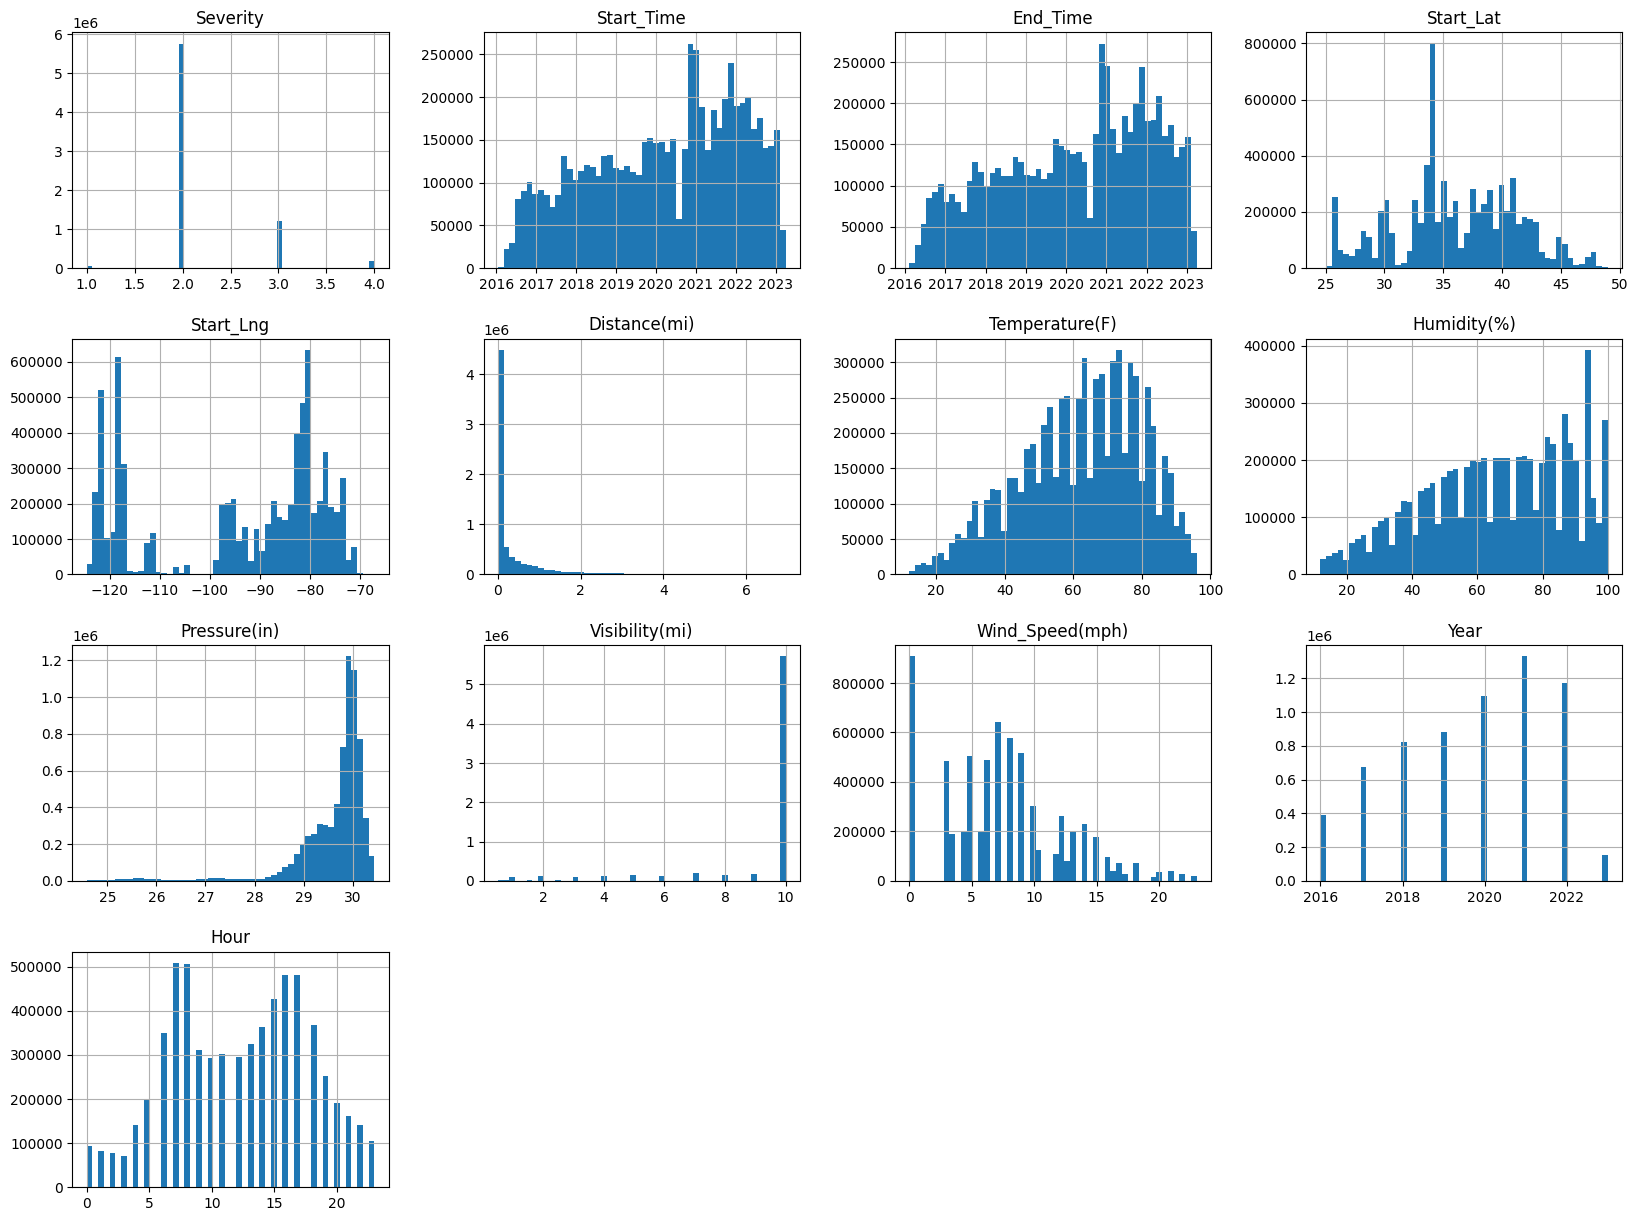

In [18]:
trim_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [19]:
trim_data.describe().T

count                           mean  \
Severity         7201606.0                       2.208856   
Start_Time         6514122  2020-03-21 11:53:09.480676352   
End_Time           6514122  2020-03-21 19:08:51.412052224   
Start_Lat        7201606.0                      36.065885   
Start_Lng        7201606.0                      -94.37821   
Distance(mi)     7201606.0                        0.43518   
Temperature(F)   7041731.0                      62.323911   
Humidity(%)      7032472.0                      65.629264   
Pressure(in)     7063508.0                      29.608994   
Visibility(mi)   7030338.0                       9.102024   
Wind_Speed(mph)  6663051.0                       7.489998   
Year             6514122.0                    2019.697148   
Hour             6514122.0                      12.268913   

                                 min                         25%  \
Severity                         1.0                         2.0   
Start_Time       2016-01-14 20:18:33  2018-09-17 16:40:04.500000   
End_Time         2016-02-08 06:37:08         2018-09-17 17:42:12   
Start_Lat                    24.5548                   33.208382   
Start_Lng                -124.623833                 -117.260943   
Distance(mi)                     0.0                         0.0   
Temperature(F)                  12.2                        50.0   
Humidity(%)                     12.0                        49.0   
Pressure(in)                   24.58                       29.41   
Visibility(mi)                   0.5                        10.0   
Wind_Speed(mph)                  0.0                         4.6   
Year                          2016.0                      2018.0   
Hour                             0.0                         8.0   

                                        50%                            75%  \
Severity                                2.0                            2.0   
Start_Time       2020-06-25 08:51:12.500000     2021-10-26 06:29:26.500000   
End_Time         2020-06-25 10:44:09.500000  2021-10-26 16:49:06.249999872   
Start_Lat                         35.702248                      40.023541   
Start_Lng                        -86.821617                     -80.323518   
Distance(mi)                          0.025                          0.427   
Temperature(F)                         64.0                           76.0   
Humidity(%)                            67.0                           84.0   
Pressure(in)                          29.86                          30.03   
Visibility(mi)                         10.0                           10.0   
Wind_Speed(mph)                         7.0                           10.0   
Year                                 2020.0                         2021.0   
Hour                                   13.0                           17.0   

                                 max        std  
Severity                         4.0   0.482704  
Start_Time       2023-03-31 23:30:00        NaN  
End_Time         2023-03-31 23:59:00        NaN  
Start_Lat                  49.002201   5.080941  
Start_Lng                 -67.113167   17.44873  
Distance(mi)                   6.955   0.923819  
Temperature(F)                  96.0  17.522611  
Humidity(%)                    100.0  21.952538  
Pressure(in)                   30.44   0.785789  
Visibility(mi)                  10.0    2.20574  
Wind_Speed(mph)                 23.0   4.946136  
Year                          2023.0   1.889114  
Hour                            23.0   5.479502

## Hypothesis Testing

#### Q1: Average of Temperature(F) is 60 (one sample T-test)

$$
\begin{align}
H_{0} : \mu = 60\\
H_{1} : \mu \neq 60
\end{align}
$$

In [20]:
alpha = 0.05 
stat, p_value = stats.ttest_1samp(trim_data['Temperature(F)'].dropna(), popmean=60)

print('stat : {} , p_value : {}'.format(stat, p_value))
if p_value > alpha:
    print("accept null hypothesis")
else:
    print("reject null hypothesis")

stat : 351.93339425798456 , p_value : 0.0
reject null hypothesis


#### Q2: Average of Humidity(%) is 65 (one sample T-test)

$$
\begin{align}
H_{0} : \mu = 65\\
H_{1} : \mu \neq 65
\end{align}
$$

In [21]:
alpha = 0.05 
stat, p_value = stats.ttest_1samp(trim_data['Humidity(%)'].dropna(), popmean=65)

print('stat : {} , p_value : {}'.format(stat, p_value))
if p_value > alpha:
    print("accept null hypothesis")
else:
    print("reject null hypothesis")

stat : 76.01543948216457 , p_value : 0.0
reject null hypothesis


#### Q3: Average of Pressure(in) is 30 (one sample T-test)

$$
\begin{align}
H_{0} : \mu = 30\\
H_{1} : \mu \neq 30
\end{align}
$$

In [22]:
alpha = 0.05 
stat, p_value = stats.ttest_1samp(trim_data['Pressure(in)'].dropna(), popmean=30)

print('stat : {} , p_value : {}'.format(stat, p_value))
if p_value > alpha:
    print("accept null hypothesis")
else:
    print("reject null hypothesis")

stat : -1322.4761435582207 , p_value : 0.0
reject null hypothesis


#### Q4: Average of Wind_Speed(mph) is 7 (one sample T-test)

$$
\begin{align}
H_{0} : \mu = 7\\
H_{1} : \mu \neq 7
\end{align}
$$

In [23]:
alpha = 0.05 
stat, p_value = stats.ttest_1samp(trim_data['Wind_Speed(mph)'].dropna(), popmean=7)

print('stat : {} , p_value : {}'.format(stat, p_value))
if p_value > alpha:
    print("accept null hypothesis")
else:
    print("reject null hypothesis")

stat : 255.72029770610828 , p_value : 0.0
reject null hypothesis


#### Q5: Severity as categorical feature and Timezone as categorical feature (chi2 Test)

In [24]:
contingency_table = pd.crosstab(trim_data['Severity'], trim_data['Timezone'])
print('contingency_table : \n', contingency_table)

contingency_table : 
 Timezone  US/Central  US/Eastern  US/Mountain  US/Pacific
Severity                                                 
1              11984       31148         6043       12488
2            1170092     2733407       241059     1604938
3             306895      550208        38599      304937
4              30406      120621         9086       22011


In [25]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table.values)

In [26]:
print('chi2 stat : {} , p_value : {}'.format(chi2_stat, p_value))
print('dof : ',dof)

chi2 stat : 55298.36250997351 , p_value : 0.0
dof :  9


In [27]:
alpha = 0.05

if p_value > alpha:
    print("Retain H0,There is no relationship between 2 categorical variables")
else:
    print("Reject H0,There is a relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables


#### Q6: Severity as categorical feature and City as categorical feature (chi2 Test)

In [28]:
contingency_table = pd.crosstab(trim_data['Severity'], trim_data['City'])
print('contingency_table : \n', contingency_table)

contingency_table : 
 City      Aaronsburg  Abbeville  Abbotsford  Abbott  Abbottstown  Aberdeen  \
Severity                                                                     
1                  0          4           0       0            0         3   
2                 19        574          12       3          101      1214   
3                  2          2           2      27            0       153   
4                  0          8           5       1           15        76   

City      Abernathy  Abilene  Abingdon  Abington  ...  Zion Grove  Zionsville  \
Severity                                          ...                           
1                 0        0         3        76  ...           0           2   
2                 0       56      1149      1649  ...           2         317   
3                 0       15       269         3  ...           0         289   
4                 1       11       100         1  ...           2          63   

City      Zionville  Z

In [29]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table.values)

In [30]:
print('chi2 stat : {} , p_value : {}'.format(chi2_stat, p_value))
print('dof : ',dof)

chi2 stat : 1530203.595391002 , p_value : 0.0
dof :  40347


In [31]:
alpha = 0.05

if p_value > alpha:
    print("Retain H0,There is no relationship between 2 categorical variables")
else:
    print("Reject H0,There is a relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables


#### Q7: Severity as categorical feature and State as categorical feature (chi2 Test)

In [32]:
contingency_table = pd.crosstab(trim_data['Severity'], trim_data['State'])
print('contingency_table : \n', contingency_table)

contingency_table : 
 State        AL     AR      AZ       CA     CO     CT     DC     DE      FL  \
Severity                                                                      
1           675     37    4550     9764    121     71    143    229    6979   
2         75623  18080  104385  1360291  18953  47431  15923  11079  744173   
3         20659    638   12668   262433   8919  15434   1115    672  101070   
4          1662   2633    3442    12639   3136   3999    780   1466   12075   

State        GA  ...   SD      TN      TX     UT      VA   VT     WA     WI  \
Severity         ...                                                          
1           988  ...    0    2312    3822    575    3059    2    860     89   
2         91737  ...  199  129993  420925  69839  222490  567  70481  19435   
3         59794  ...    4   27336  111462  13308   48063  155  28924   8646   
4         12167  ...   37    3200    6655   1267   17317   67   3839   3071   

State        WV   WY  
Sever

In [33]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table.values)

In [34]:
print('chi2 stat : {} , p_value : {}'.format(chi2_stat, p_value))
print('dof : ',dof)

chi2 stat : 436092.23663790216 , p_value : 0.0
dof :  144


In [35]:
alpha = 0.05

if p_value > alpha:
    print("Retain H0,There is no relationship between 2 categorical variables")
else:
    print("Reject H0,There is a relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables


#### Q8: Pearson and Spearman Correlation between Numerical Features 

In [36]:
quantitative = [col for col in trim_data.columns if (trim_data.dtypes[col] == 'int64' or trim_data.dtypes[col] == 'float64')]
print(len(quantitative))
print()
for i, feat_1 in enumerate(quantitative):
    for j, feat_2 in enumerate(quantitative):
        if j > i:
            data1, data2 = trim_data[feat_1].dropna(), trim_data[feat_2].dropna()
            min_len = min(len(data1), len(data2))
            data1 = data1.sample(min_len)
            data2 = data2.sample(min_len)
            
            corr, p_value = stats.pearsonr(data1, data2)
            print(f'Parametric Pearson Corr Test Between {feat_1} and {feat_2}: corr = {corr:.4f} , p_value = {p_value:.4f}')

            corr, p_value = stats.spearmanr(data1, data2)
            print(f'Non-Parametric Spearman Corr Test Between {feat_1} and {feat_2}: corr = {corr:.4f} , p_value = {p_value:.4f}')
            print()

11

Parametric Pearson Corr Test Between Severity and Start_Lat: corr = 0.0005 , p_value = 0.1766
Non-Parametric Spearman Corr Test Between Severity and Start_Lat: corr = 0.0007 , p_value = 0.0768

Parametric Pearson Corr Test Between Severity and Start_Lng: corr = -0.0003 , p_value = 0.4708
Non-Parametric Spearman Corr Test Between Severity and Start_Lng: corr = -0.0001 , p_value = 0.8232

Parametric Pearson Corr Test Between Severity and Distance(mi): corr = -0.0005 , p_value = 0.1856
Non-Parametric Spearman Corr Test Between Severity and Distance(mi): corr = 0.0001 , p_value = 0.7537

Parametric Pearson Corr Test Between Severity and Temperature(F): corr = -0.0005 , p_value = 0.1576
Non-Parametric Spearman Corr Test Between Severity and Temperature(F): corr = -0.0006 , p_value = 0.1304

Parametric Pearson Corr Test Between Severity and Humidity(%): corr = -0.0003 , p_value = 0.4056
Non-Parametric Spearman Corr Test Between Severity and Humidity(%): corr = -0.0003 , p_value = 0.4678


#### Q9: State Effect on Temperature(F) (ANOVA) 

$$
\begin{align}
H_{0} : \mu_{California} = \mu_{Florida} = \mu_{Texas} \\
H_{1} : \mu_{California} \neq \mu_{Florida} \neq \mu_{Texas}
\end{align}
$$

In [37]:
cal = trim_data[trim_data['State'] == 'CA'].dropna()
flo = trim_data[trim_data['State'] == 'FL'].dropna()
tex = trim_data[trim_data['State'] == 'TX'].dropna()
min_len = min(len(cal), len(flo), len(tex))
cal = cal.sample(min_len)
flo = flo.sample(min_len)
tex = tex.sample(min_len)

In [38]:
alpha = 0.05 
stat, p_value = stats.f_oneway(cal['Temperature(F)'], flo['Temperature(F)'], tex['Temperature(F)'])

print('stat : {} , p_value : {}'.format(stat, p_value))
if p_value > alpha:
    print("accept null hypothesis")
else:
    print("reject null hypothesis")

stat : 97023.75538592732 , p_value : 0.0
reject null hypothesis


#### Q10: Timezone Effect on Temperature(F) (ANOVA) 

$$
\begin{align}
H_{0} : \mu_{US/Eastern} = \mu_{US/Pacific} = \mu_{US/Central} = \mu_{US/Mountain} \\
H_{1} : \mu_{US/Eastern} \neq \mu_{US/Pacific} \neq \mu_{US/Central} \neq \mu_{US/Mountain}
\end{align}
$$

In [39]:
eas = trim_data[trim_data['Timezone'] == 'US/Eastern'].dropna()
pac = trim_data[trim_data['Timezone'] == 'US/Pacific'].dropna()
cen = trim_data[trim_data['Timezone'] == 'US/Central'].dropna()
mou = trim_data[trim_data['Timezone'] == 'US/Mountain'].dropna()
min_len = min(len(eas), len(pac), len(cen), len(mou))
eas = eas.sample(min_len)
pac = pac.sample(min_len)
cen = cen.sample(min_len)
mou = mou.sample(min_len)

In [40]:
alpha = 0.05 
stat, p_value = stats.f_oneway(eas['Temperature(F)'], pac['Temperature(F)'], cen['Temperature(F)'], mou['Temperature(F)'])

print('stat : {} , p_value : {}'.format(stat, p_value))
if p_value > alpha:
    print("accept null hypothesis")
else:
    print("reject null hypothesis")

stat : 3358.577753270328 , p_value : 0.0
reject null hypothesis


## Exploratory Data Analysis (EDA)

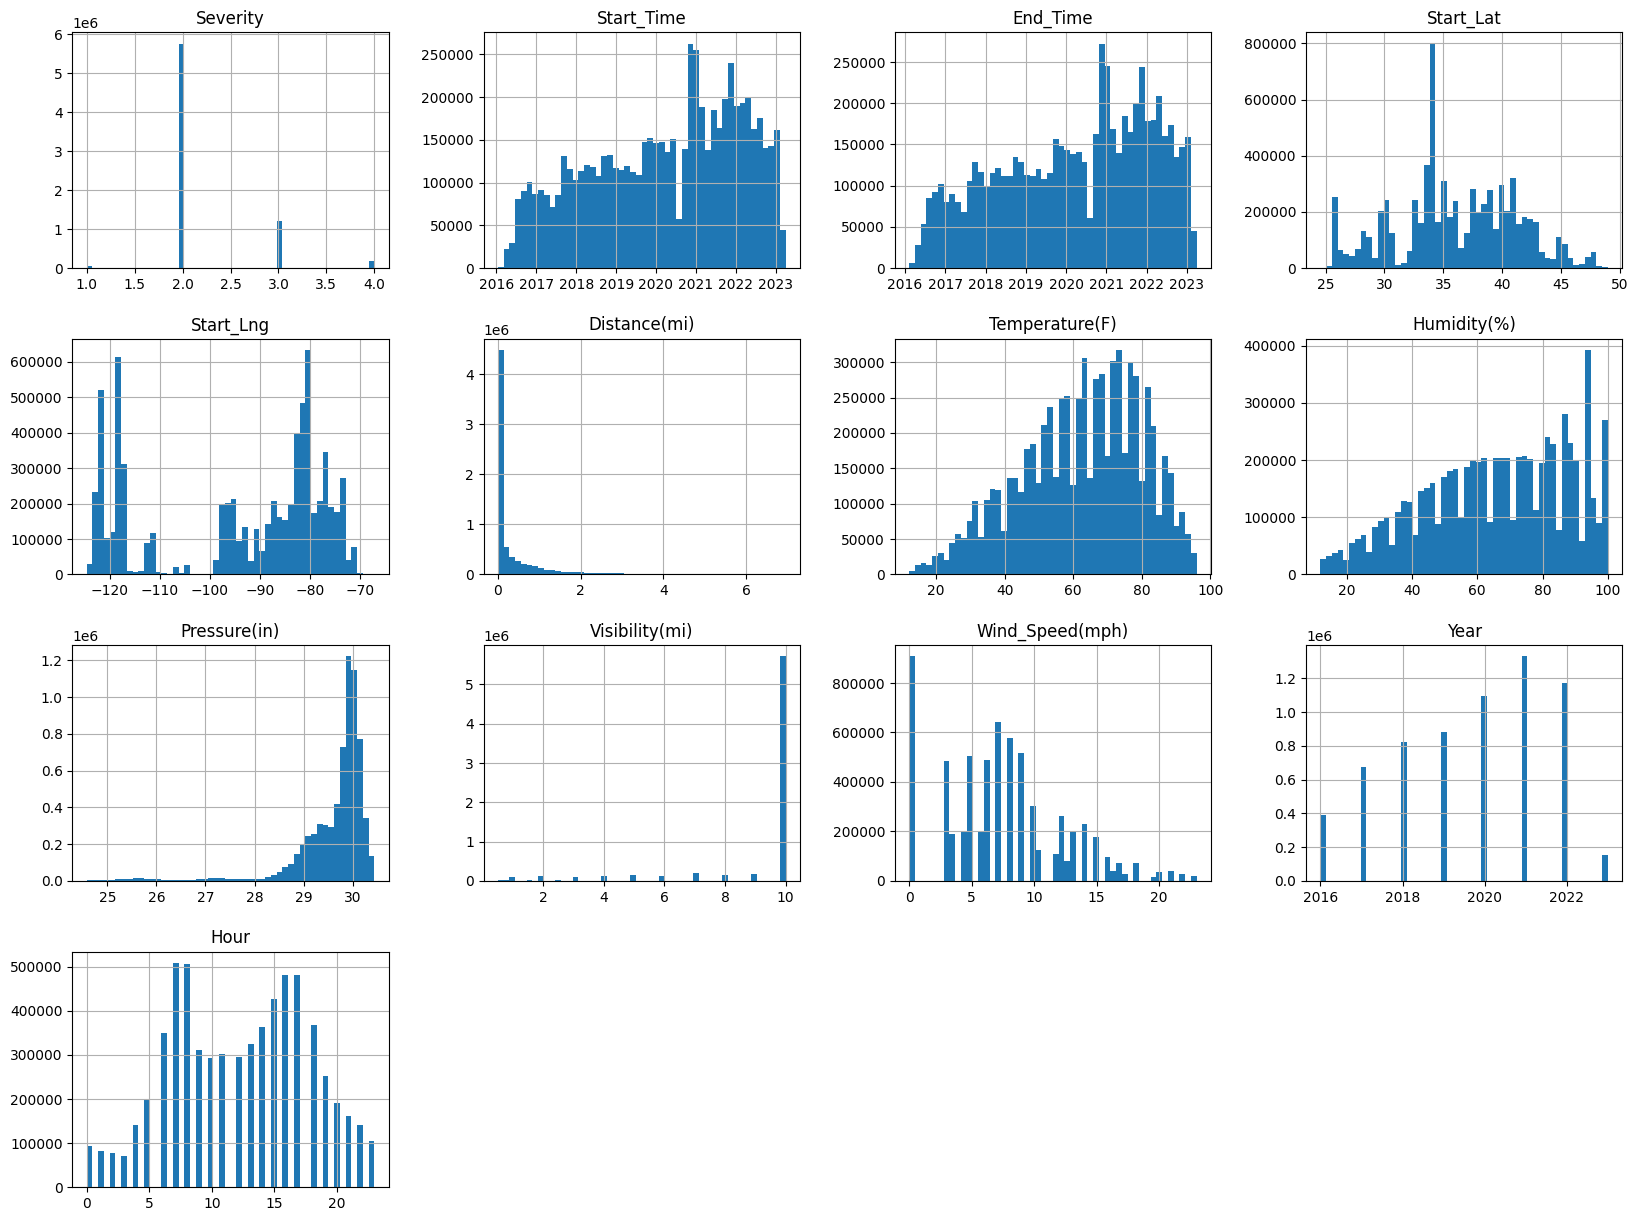

In [41]:
trim_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [42]:
def create_feature_df(feature_name):
    df = pd.DataFrame(trim_data.groupby([feature_name]).size()).reset_index()
    df = df.rename(columns={0: 'NumberOfAccidents'})
    return df

def sorted_feature_df(df):
    sorted_df = df.sort_values(by=['NumberOfAccidents'], ascending=False)
    return sorted_df

def show_pieplot_of_feature(feature_name, labels):
    plt.pie(trim_data[feature_name].value_counts().values, labels=labels, autopct='%1.2f%%')
    plt.title(f'Percentage of Accidents based on {feature_name}')
    plt.show()
    
def show_countplot_of_feature(feature_name):
    plt.figure(figsize=(10, 7))
    sns.countplot(x=trim_data[feature_name])
    plt.title(f'Number Of Accidents in each {feature_name}', fontsize=14, fontweight='bold')
    plt.xlabel(feature_name, fontsize=13, fontweight='bold')
    plt.ylabel('NumberOfAccidents', fontsize=13, fontweight='bold')
    plt.show()
    
def show_boxplot_of_feature(feature_name):
    plt.figure(figsize=(10, 7))
    sns.boxplot(x=trim_data[feature_name])
    plt.title(f'Number Of Accidents in different {feature_name}', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.xlabel(feature_name, fontsize=13, fontweight='bold')
    plt.show()
    
def show_violinplot_of_feature(feature_name):
    plt.figure(figsize=(10, 7))
    sns.violinplot(x=trim_data[feature_name])
    plt.title(f'Distributoin Of Accidents in different {feature_name}', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.xlabel(feature_name, fontsize=13, fontweight='bold')
    plt.show()
    
def show_barplot_of_feature(df, feature_name, title):
    fig, ax = plt.subplots(figsize=(12,6))

    ax = sns.barplot(x=df[feature_name], y=df['NumberOfAccidents'], palette='gnuplot2')
    ax1 = ax.twinx()
    sns.lineplot(data=df, marker='o', x=feature_name, y='NumberOfAccidents', color='white', alpha=.8)

    total = trim_data.shape[0]
    for i in ax.patches:
        ax.text(i.get_x()+0.04, i.get_height(), \
                '{:,d}'.format(int(i.get_height())), fontsize=12.5, weight='bold',
                color='red')

    plt.xticks(rotation=30, fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title, fontsize=13, fontweight='bold')
    ax.set_xlabel(feature_name, fontsize=13, fontweight='bold')
    ax.set_ylabel('NumberOfAccidents', fontsize=13, fontweight='bold')
    plt.show()

### Severity Analysis

In [43]:
trim_data['Severity'].describe()

count    7.201606e+06
mean     2.208856e+00
std      4.827035e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      4.000000e+00
Name: Severity, dtype: float64

In [44]:
severity = create_feature_df('Severity')
severity

Severity  NumberOfAccidents
0         1              61743
1         2            5756294
2         3            1201295
3         4             182274

In [45]:
sorted_severity = sorted_feature_df(severity)
sorted_severity

Severity  NumberOfAccidents
1         2            5756294
2         3            1201295
3         4             182274
0         1              61743

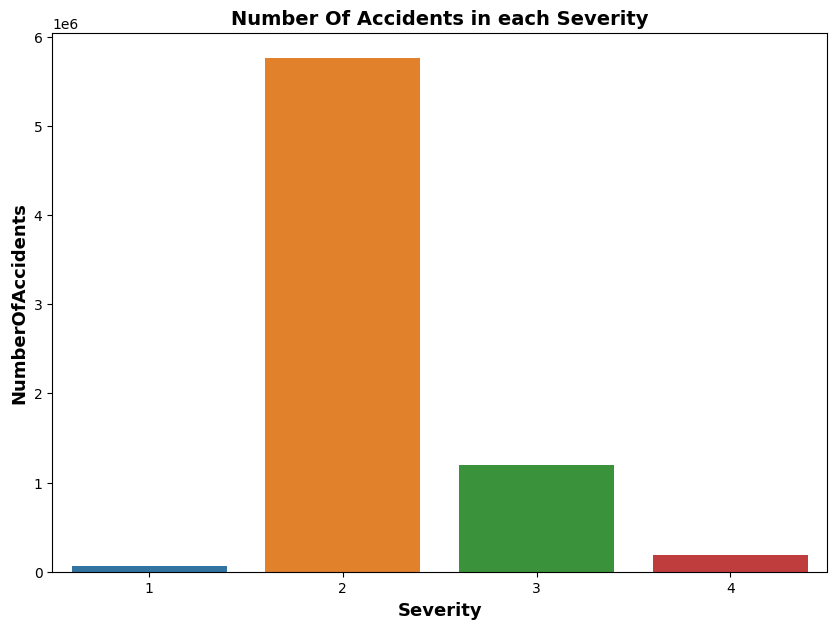

In [46]:
show_countplot_of_feature('Severity')

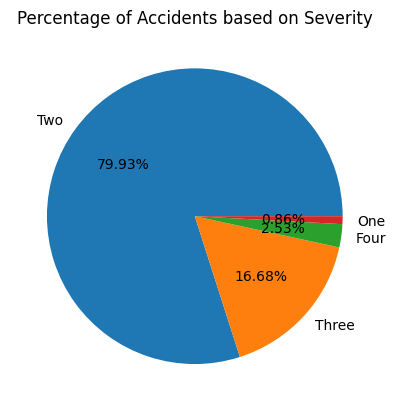

In [47]:
labels = ['Two', 'Three', 'Four', 'One']
show_pieplot_of_feature('Severity', labels)

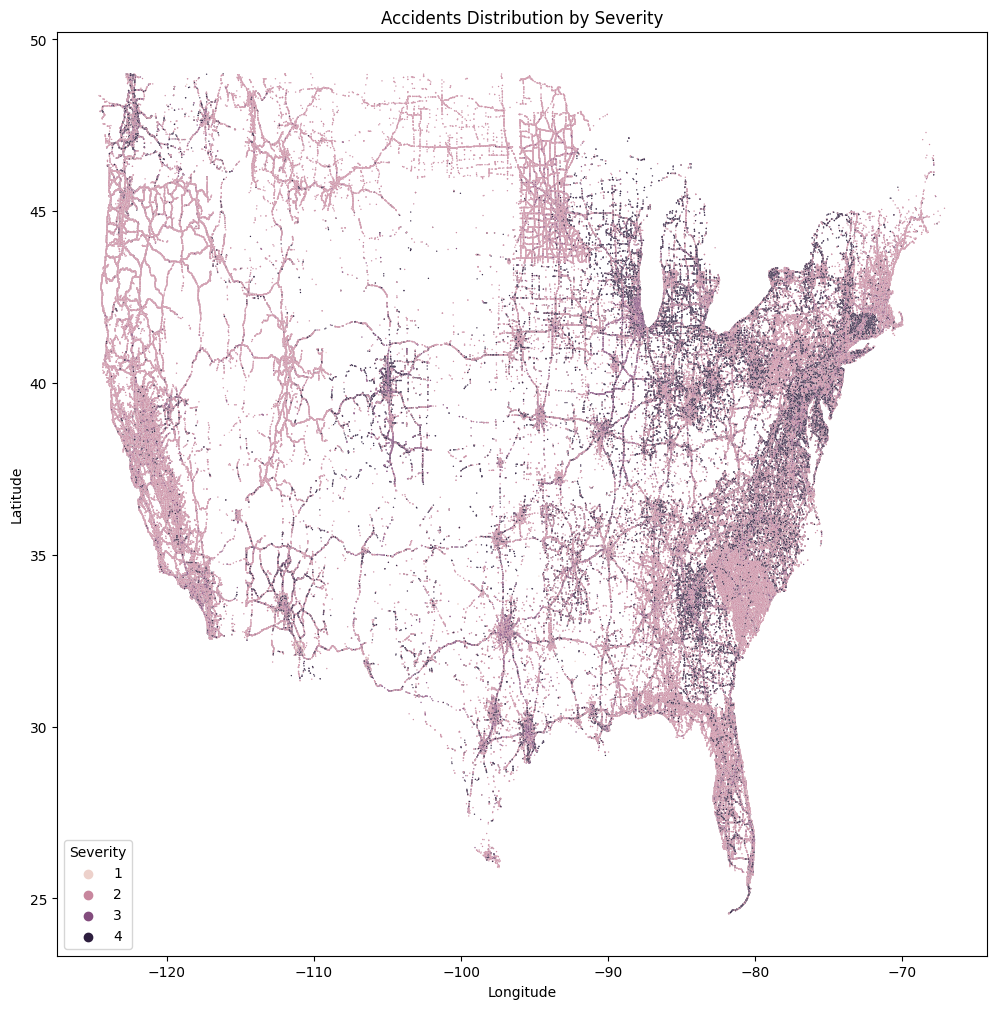

In [48]:
plt.figure(figsize=(12, 12))
sns.scatterplot(x=trim_data.Start_Lng, y=trim_data.Start_Lat, hue=data.Severity, s=1)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accidents Distribution by Severity')

plt.legend(title='Severity')
plt.show()

In [49]:
del severity
del sorted_severity

### Distance Analysis

In [50]:
trim_data['Distance(mi)'].describe().T

count    7.201606e+06
mean     4.351800e-01
std      9.238191e-01
min      0.000000e+00
25%      0.000000e+00
50%      2.500000e-02
75%      4.270000e-01
max      6.955000e+00
Name: Distance(mi), dtype: float64

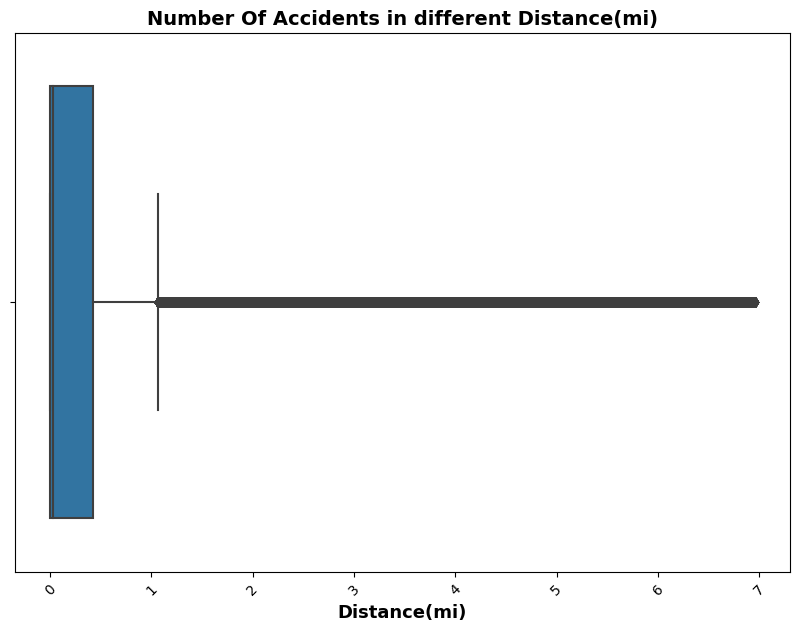

In [51]:
show_boxplot_of_feature('Distance(mi)')

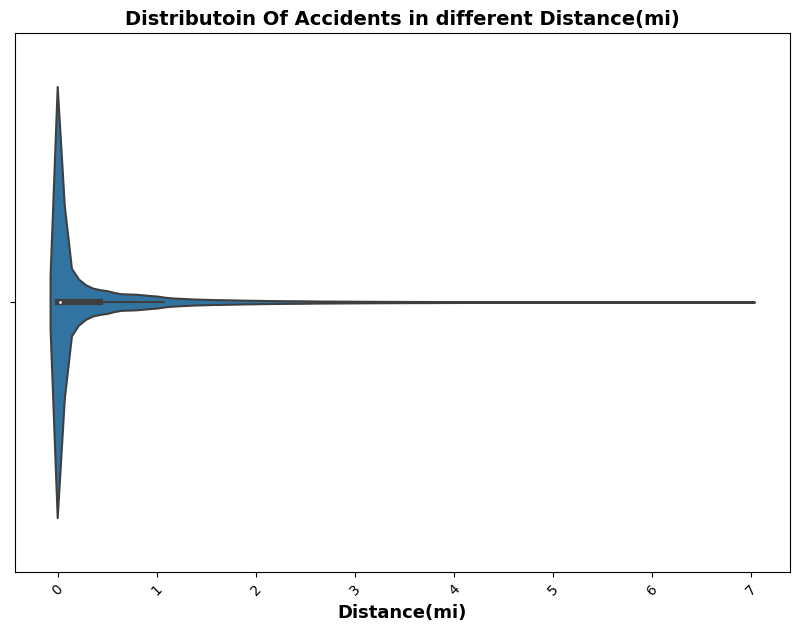

In [52]:
show_violinplot_of_feature('Distance(mi)')

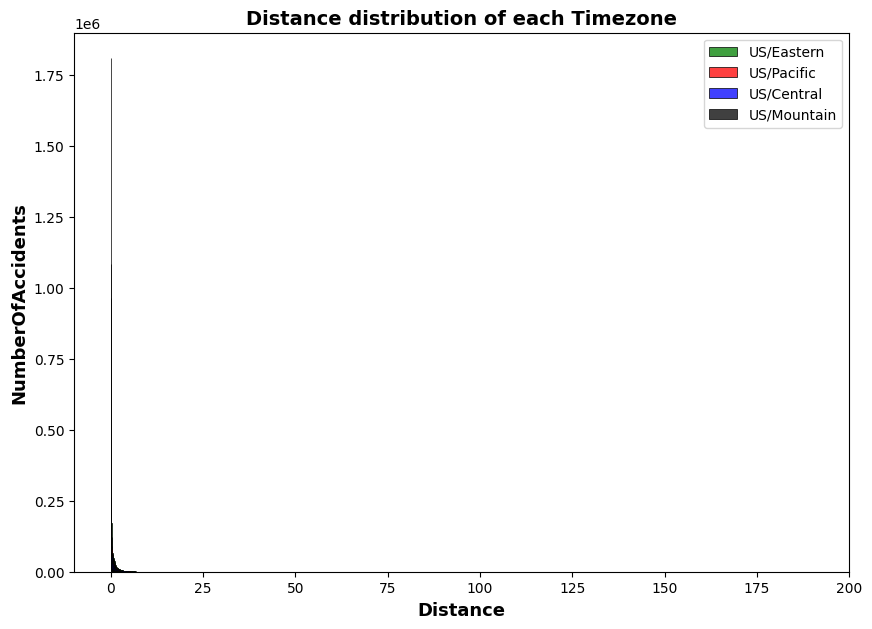

In [53]:
eas = trim_data[trim_data['Timezone'] == 'US/Eastern']
pac = trim_data[trim_data['Timezone'] == 'US/Pacific']
cen = trim_data[trim_data['Timezone'] == 'US/Central']
mou = trim_data[trim_data['Timezone'] == 'US/Mountain']

labels = ['US/Eastern', 'US/Pacific', 'US/Central', 'US/Mountain']
plt.figure(figsize=(10,7))
sns.histplot(x=eas['Distance(mi)'], color='green', bins=100)
sns.histplot(x=pac['Distance(mi)'], color='red', bins=100)
sns.histplot(x=cen['Distance(mi)'], color='blue', bins=100)
sns.histplot(x=mou['Distance(mi)'], color='black', bins=100)
plt.title('Distance distribution of each Timezone', fontsize=14, fontweight="bold")
plt.legend(labels)
plt.xlim([-10, 200])
plt.xlabel('Distance', fontsize=13, fontweight="bold")
plt.ylabel('NumberOfAccidents', fontsize=13, fontweight="bold")
plt.show()

### Street Analysis

In [54]:
trim_data['Street'].describe().T

count     7191435
unique     326552
top        I-95 N
freq        74882
Name: Street, dtype: object

In [55]:
street = create_feature_df('Street')
street

Street  NumberOfAccidents
0                1 1/2 Ave                  4
1                1 Mile Rd                  1
2                      1-2                  1
3                  1/2 Ave                 27
4               1/2 Ave NW                  1
...                    ...                ...
326547          Zverina Ln                  1
326548          Zygmunt Dr                  1
326549          de Lee Way                  1
326550  del Tura Plaza Cir                  1
326551    william Carey Dr                  4

[326552 rows x 2 columns]

In [56]:
sorted_street = sorted_feature_df(street)
sorted_street

Street  NumberOfAccidents
219908           I-95 N              74882
219909           I-95 S              71036
219563            I-5 N              68278
219097           I-10 E              50170
219103           I-10 W              49579
...                 ...                ...
156586    Aqueduct Dr E                  1
232536         Loper St                  1
232535       Lootens Pl                  1
232534  Loose Strife Dr                  1
146228      Yorkdale Rd                  1

[326552 rows x 2 columns]

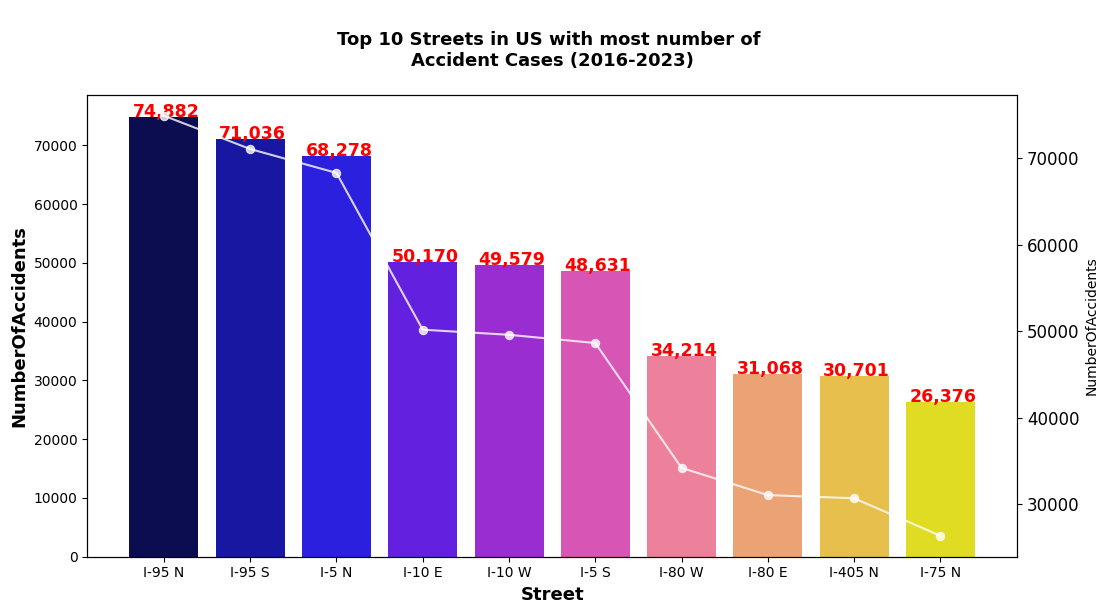

In [57]:
show_barplot_of_feature(sorted_street.head(10), 'Street', '\nTop 10 Streets in US with most number of \nAccident Cases (2016-2023)\n')

In [58]:
del street
del sorted_street

### City Analysis

In [59]:
trim_data['City'].describe().T

count     7201369
unique      13450
top         Miami
freq       185415
Name: City, dtype: object

In [60]:
city = create_feature_df('City')
city

City  NumberOfAccidents
0        Aaronsburg                 21
1         Abbeville                588
2        Abbotsford                 19
3            Abbott                 31
4       Abbottstown                116
...             ...                ...
13445       Zortman                 11
13446  Zumbro Falls                 68
13447      Zumbrota                433
13448          Zuni                 64
13449       Zwingle                 12

[13450 rows x 2 columns]

In [61]:
sorted_city = sorted_feature_df(city)
sorted_city

City  NumberOfAccidents
7547         Miami             185415
5471       Houston             163833
6777   Los Angeles             152253
1994     Charlotte             135536
2781        Dallas             117872
...            ...                ...
4967        Hansen                  1
3049   District 16                  1
9748      Proberta                  1
6724    Lone Grove                  1
4420  Gibbonsville                  1

[13450 rows x 2 columns]

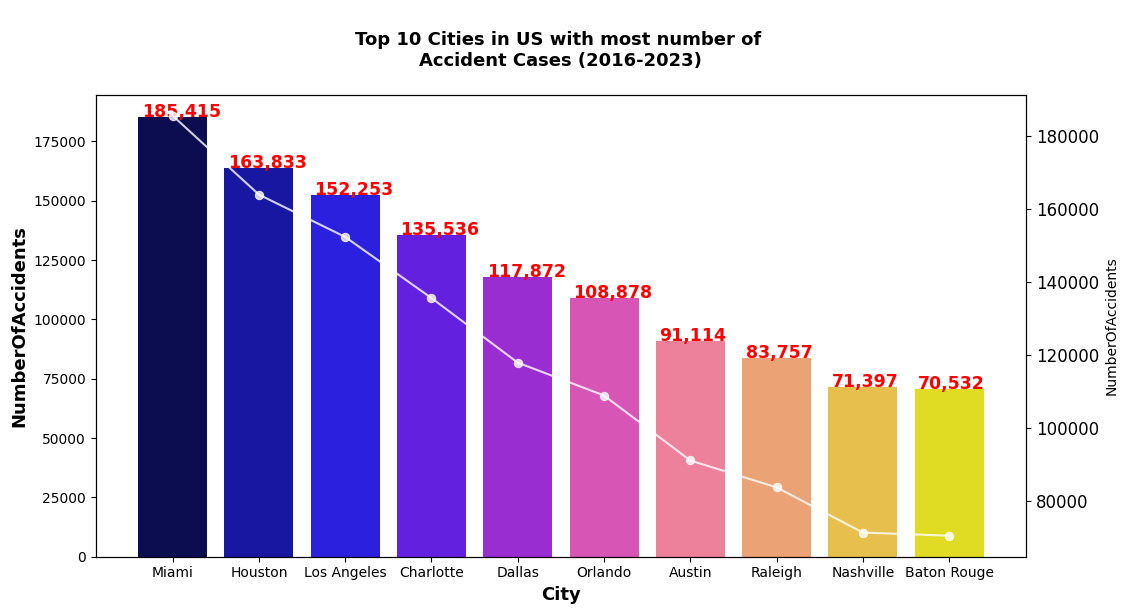

In [62]:
show_barplot_of_feature(sorted_city.head(10), 'City', '\nTop 10 Cities in US with most number of \nAccident Cases (2016-2023)\n')

In [63]:
del city
del sorted_city

### County Analysis

In [64]:
trim_data['County'].describe().T

count         7201606
unique           1856
top       Los Angeles
freq           502855
Name: County, dtype: object

In [65]:
county = create_feature_df('County')
county

County  NumberOfAccidents
0     Abbeville               1107
1        Acadia                306
2      Accomack                614
3           Ada               5685
4         Adair                341
...         ...                ...
1851      Young                  7
1852       Yuba               4507
1853       Yuma                659
1854     Zavala                 20
1855    Ziebach                  2

[1856 rows x 2 columns]

In [66]:
sorted_county = sorted_feature_df(county)
sorted_county

County  NumberOfAccidents
967       Los Angeles             502855
1085       Miami-Dade             249514
1221           Orange             234924
724            Harris             174962
1068      Mecklenburg             143848
...               ...                ...
686           Gregory                  1
710              Hand                  1
713            Hanson                  1
1318  Poquoson (City)                  1
1057         Mcdowell                  1

[1856 rows x 2 columns]

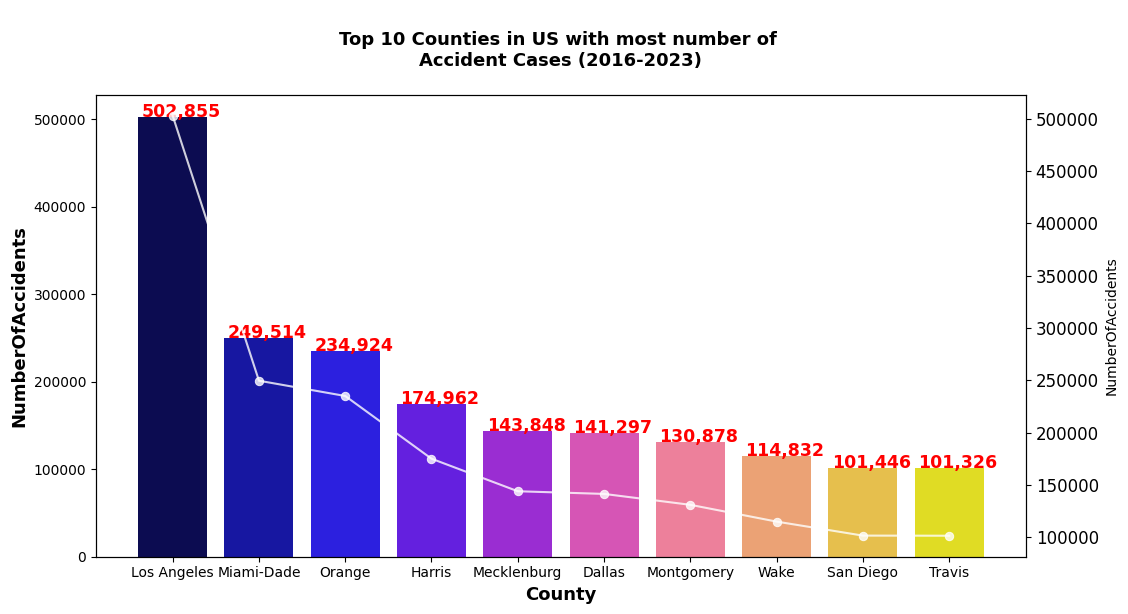

In [67]:
show_barplot_of_feature(sorted_county.head(10), 'County', '\nTop 10 Counties in US with most number of \nAccident Cases (2016-2023)\n')

In [68]:
del county
del sorted_county

### State Analysis

In [69]:
us_states = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}


def convert(x): 
    return us_states[x]

trim_data['State'] = trim_data['State'].apply(convert)

In [70]:
trim_data['State'].describe().T

count        7201606
unique            49
top       California
freq         1645127
Name: State, dtype: object

In [71]:
state = create_feature_df('State')
state

State  NumberOfAccidents
0                Alabama              98619
1                Arizona             125045
2               Arkansas              21388
3             California            1645127
4               Colorado              31129
5            Connecticut              66935
6               Delaware              13446
7   District of Columbia              17961
8                Florida             864297
9                Georgia             164686
10                 Idaho              10216
11              Illinois             156366
12               Indiana              61922
13                  Iowa              21229
14                Kansas              19206
15              Kentucky              30879
16             Louisiana             145868
17                 Maine               2451
18              Maryland             134334
19         Massachusetts              57640
20              Michigan             152483
21             Minnesota             154207
22           Mississippi              14762
23              Missouri              72555
24               Montana              19121
25              Nebraska              26232
26                Nevada              17266
27         New Hampshire               9369
28            New Jersey             134048
29            New Mexico               6804
30              New York             320040
31        North Carolina             329831
32          North Dakota               2538
33                  Ohio             110217
34              Oklahoma              77577
35                Oregon             166424
36          Pennsylvania             278553
37          Rhode Island              15972
38        South Carolina             372546
39          South Dakota                240
40             Tennessee             162841
41                 Texas             542864
42                  Utah              84989
43               Vermont                791
44              Virginia             290929
45            Washington             104104
46         West Virginia              13324
47             Wisconsin              31241
48               Wyoming                994

In [72]:
sorted_state = sorted_feature_df(state)
sorted_state

State  NumberOfAccidents
3             California            1645127
8                Florida             864297
41                 Texas             542864
38        South Carolina             372546
31        North Carolina             329831
30              New York             320040
44              Virginia             290929
36          Pennsylvania             278553
35                Oregon             166424
9                Georgia             164686
40             Tennessee             162841
11              Illinois             156366
21             Minnesota             154207
20              Michigan             152483
16             Louisiana             145868
18              Maryland             134334
28            New Jersey             134048
1                Arizona             125045
33                  Ohio             110217
45            Washington             104104
0                Alabama              98619
42                  Utah              84989
34              Oklahoma              77577
23              Missouri              72555
5            Connecticut              66935
12               Indiana              61922
19         Massachusetts              57640
47             Wisconsin              31241
4               Colorado              31129
15              Kentucky              30879
25              Nebraska              26232
2               Arkansas              21388
13                  Iowa              21229
14                Kansas              19206
24               Montana              19121
7   District of Columbia              17961
26                Nevada              17266
37          Rhode Island              15972
22           Mississippi              14762
6               Delaware              13446
46         West Virginia              13324
10                 Idaho              10216
27         New Hampshire               9369
29            New Mexico               6804
32          North Dakota               2538
17                 Maine               2451
48               Wyoming                994
43               Vermont                791
39          South Dakota                240

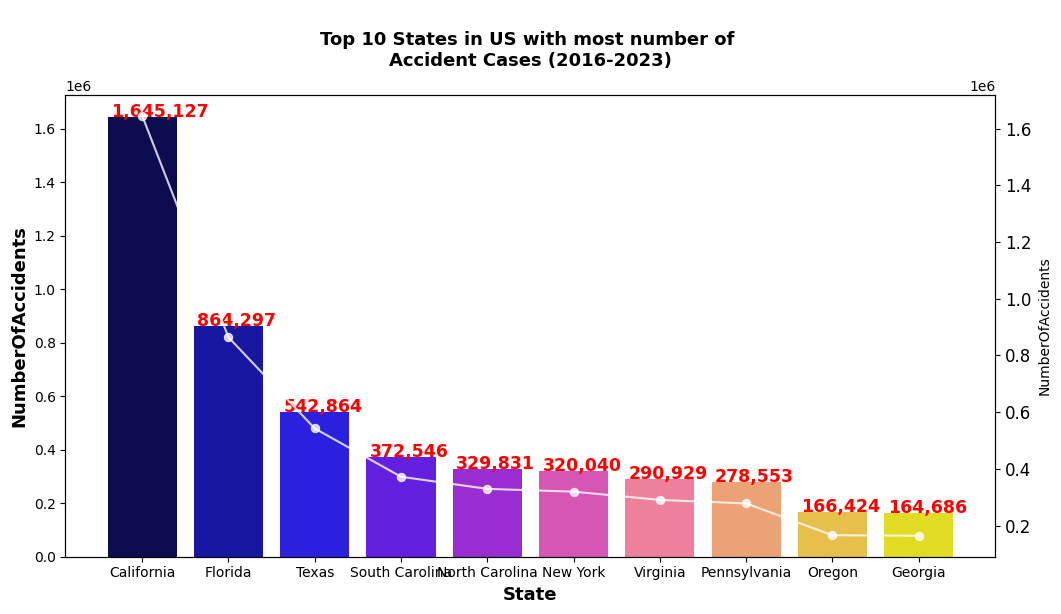

In [73]:
show_barplot_of_feature(sorted_state.head(10), 'State', '\nTop 10 States in US with most number of \nAccident Cases (2016-2023)\n')

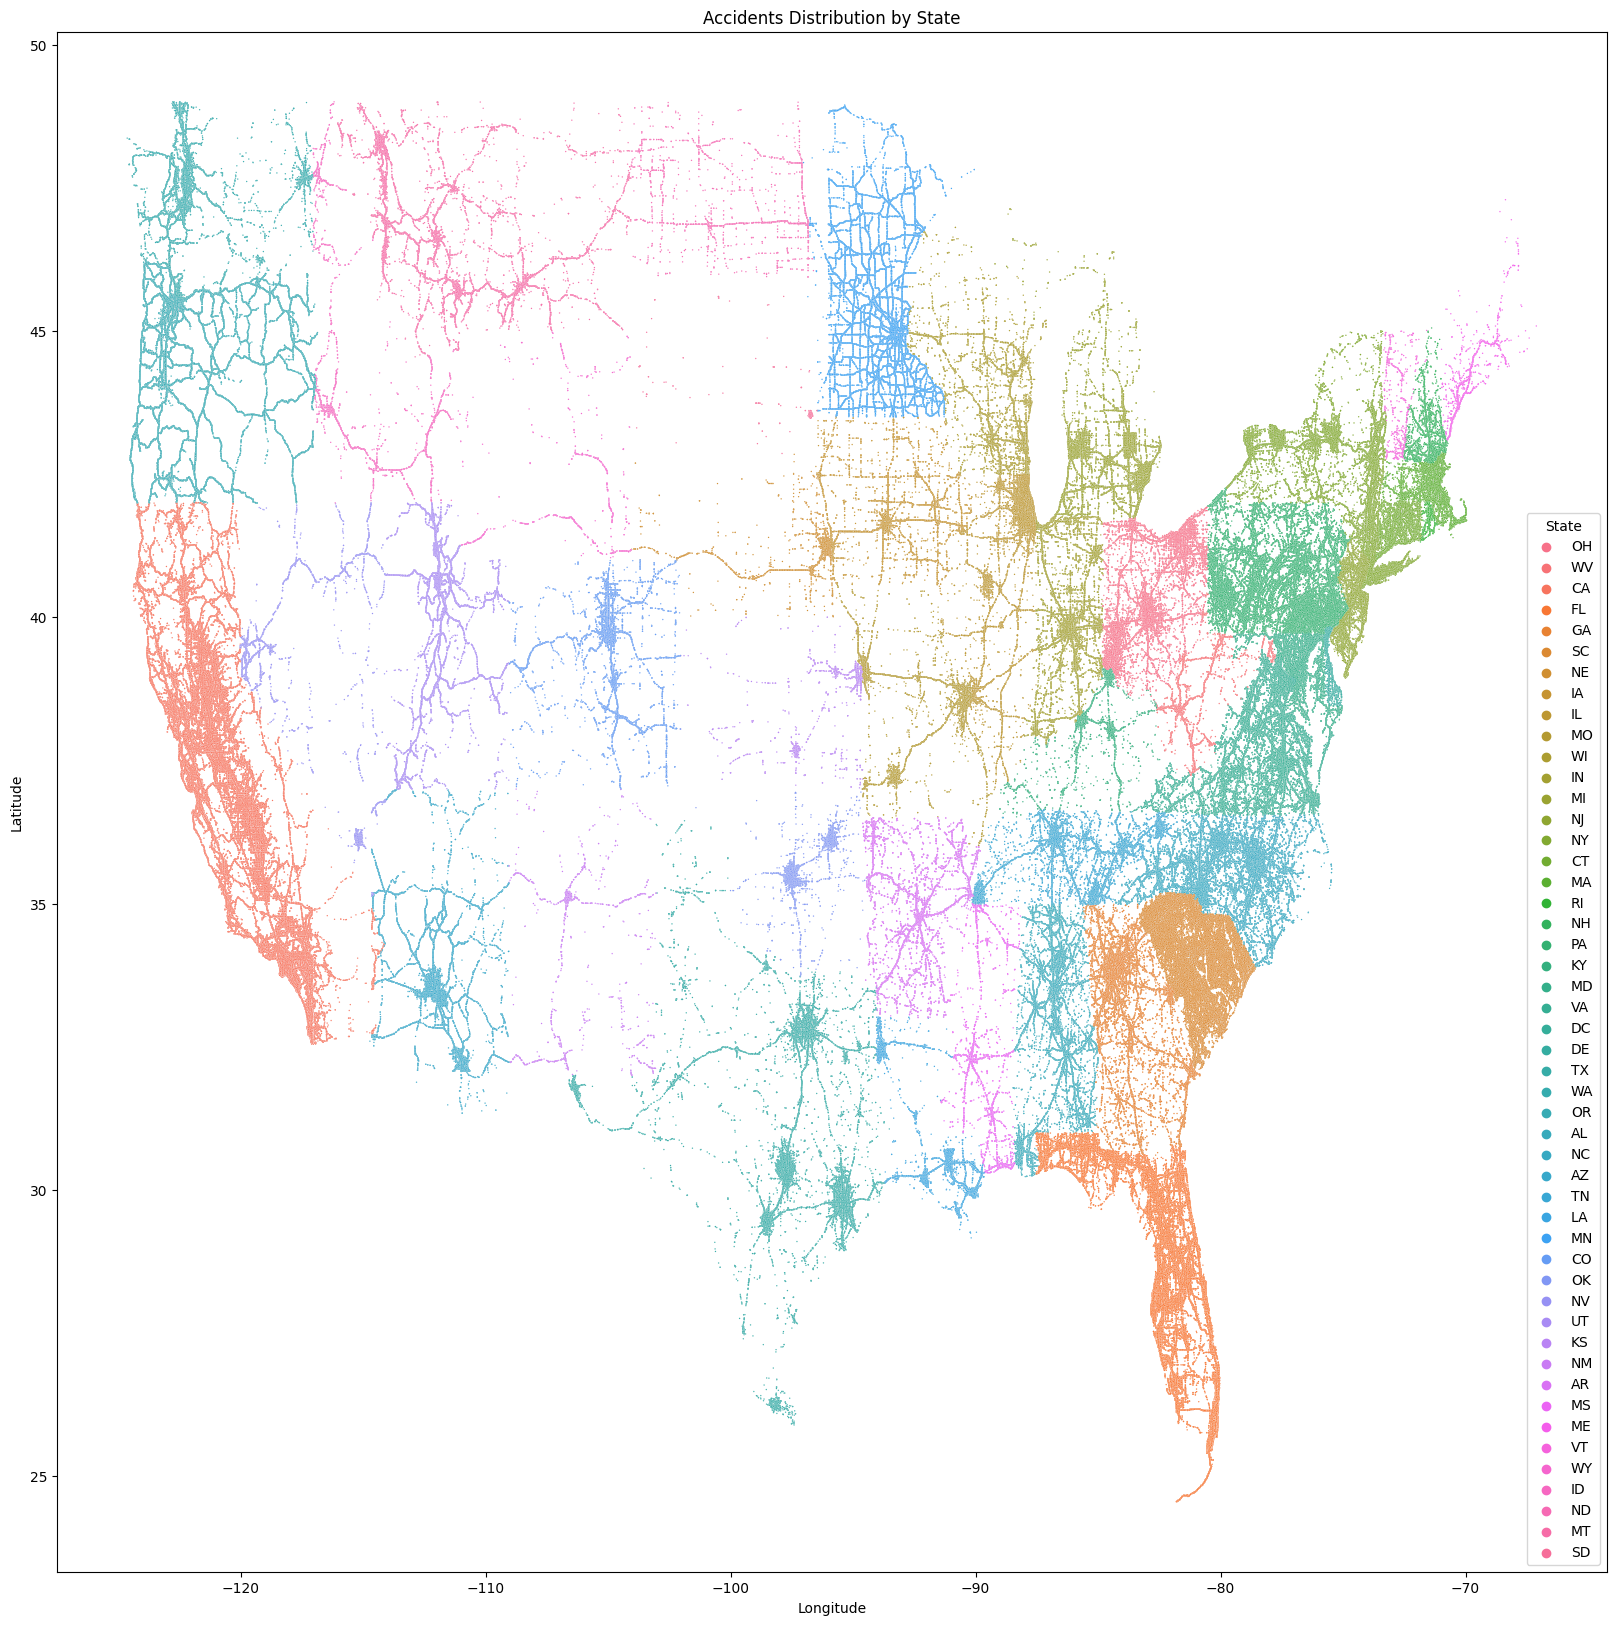

In [74]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x=trim_data.Start_Lng, y=trim_data.Start_Lat, hue=data.State, s=1)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accidents Distribution by State')

plt.legend(title='State')
plt.show()

In [75]:
del state
del sorted_state

### Timezone Analysis

In [76]:
trim_data['Timezone'].describe().T

count        7193922
unique             4
top       US/Eastern
freq         3435384
Name: Timezone, dtype: object

In [77]:
timezone = create_feature_df('Timezone')
timezone

Timezone  NumberOfAccidents
0   US/Central            1519377
1   US/Eastern            3435384
2  US/Mountain             294787
3   US/Pacific            1944374

In [78]:
sorted_timezone = sorted_feature_df(timezone)
sorted_timezone

Timezone  NumberOfAccidents
1   US/Eastern            3435384
3   US/Pacific            1944374
0   US/Central            1519377
2  US/Mountain             294787

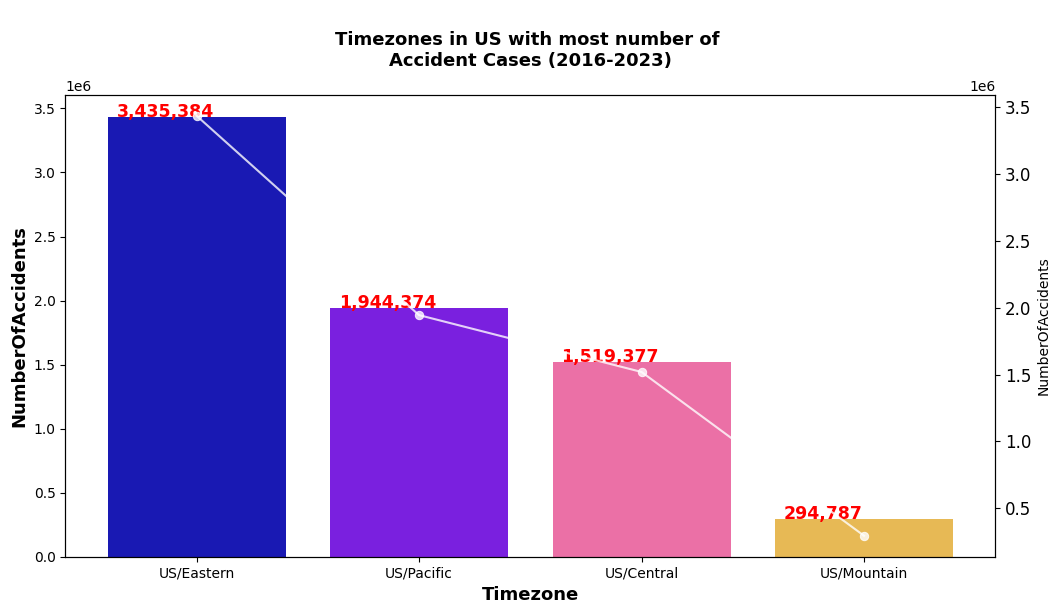

In [79]:
show_barplot_of_feature(sorted_timezone, 'Timezone', '\nTimezones in US with most number of \nAccident Cases (2016-2023)\n')

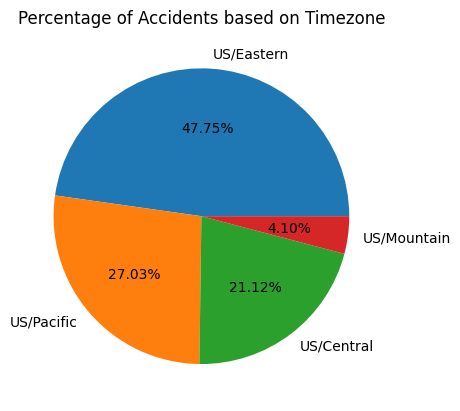

In [80]:
labels = ['US/Eastern', 'US/Pacific', 'US/Central', 'US/Mountain']
show_pieplot_of_feature('Timezone', labels)

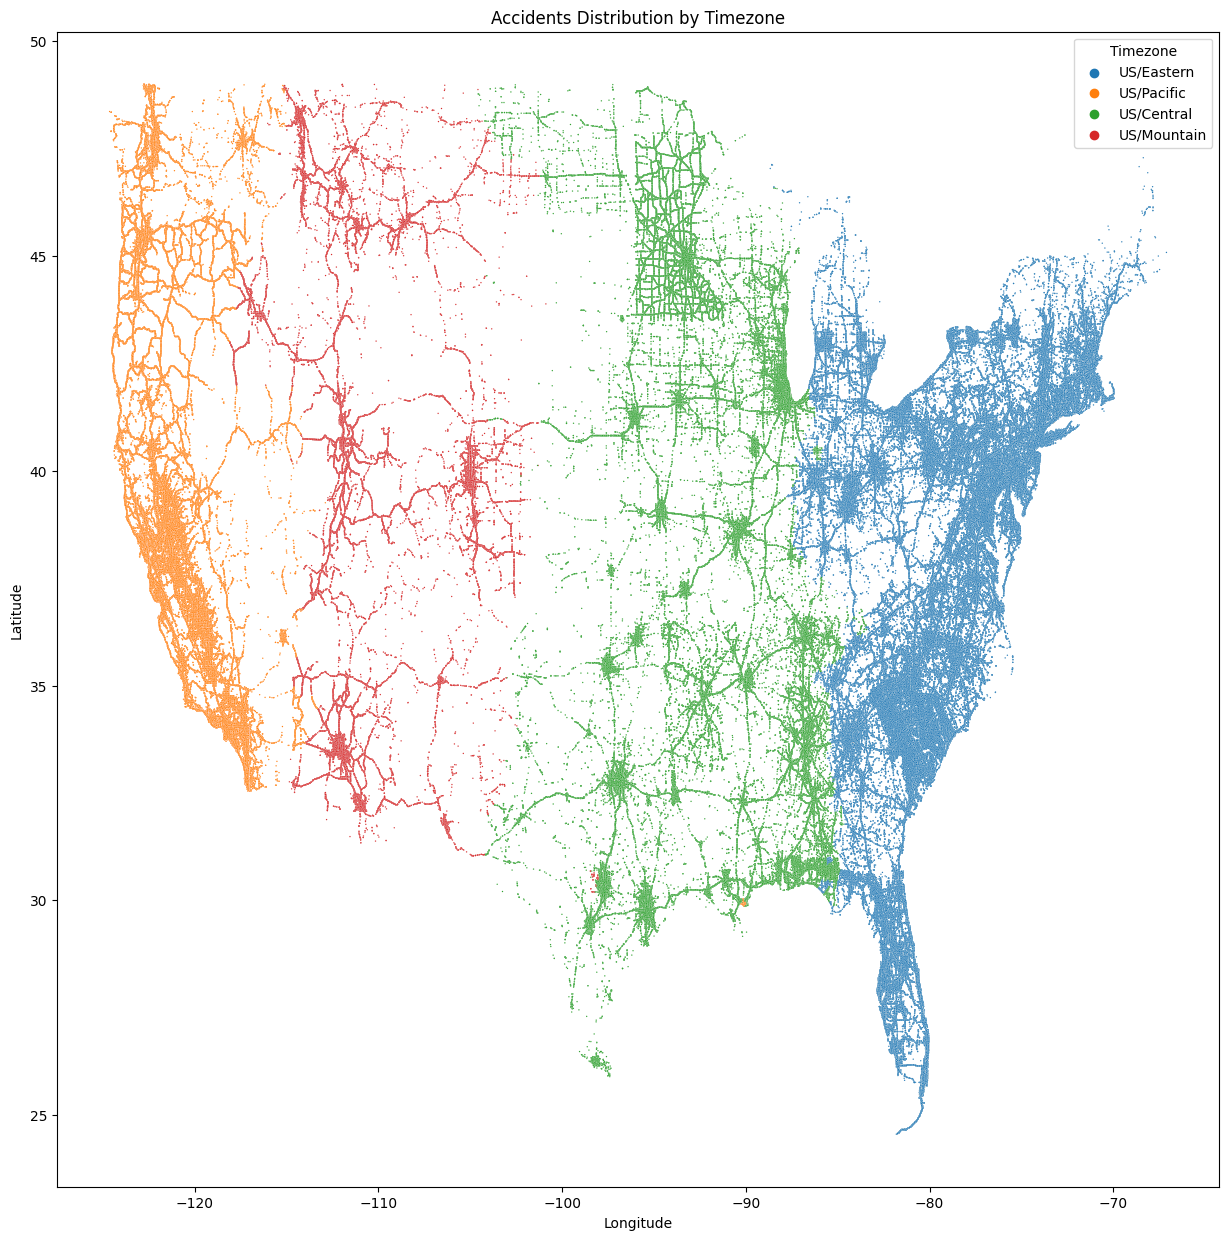

In [81]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x=trim_data.Start_Lng, y=trim_data.Start_Lat, hue=trim_data.Timezone, s=1)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accidents Distribution by Timezone')

plt.legend(title='Timezone')
plt.show()

In [82]:
del timezone
del sorted_timezone

### Temperature(F) Analysis

In [83]:
trim_data['Temperature(F)'].describe().T

count    7.041731e+06
mean     6.232391e+01
std      1.752261e+01
min      1.220000e+01
25%      5.000000e+01
50%      6.400000e+01
75%      7.600000e+01
max      9.600000e+01
Name: Temperature(F), dtype: float64

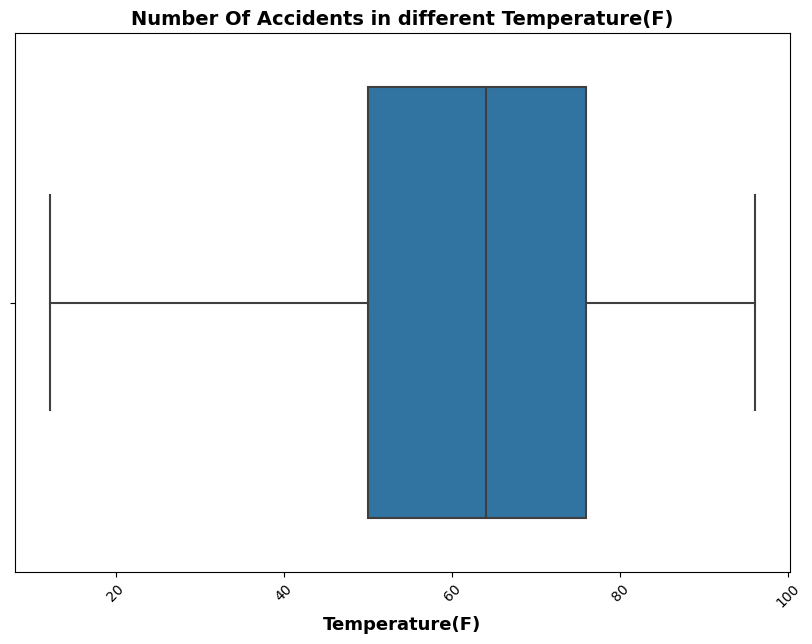

In [84]:
show_boxplot_of_feature('Temperature(F)')

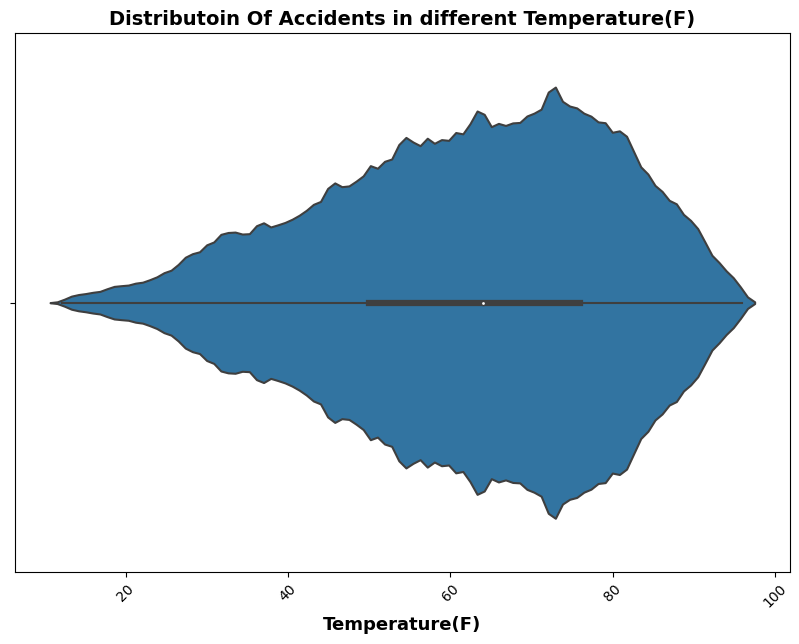

In [85]:
show_violinplot_of_feature('Temperature(F)')

### Humidity(%) Analysis

In [86]:
trim_data['Humidity(%)'].describe().T

count    7.032472e+06
mean     6.562926e+01
std      2.195254e+01
min      1.200000e+01
25%      4.900000e+01
50%      6.700000e+01
75%      8.400000e+01
max      1.000000e+02
Name: Humidity(%), dtype: float64

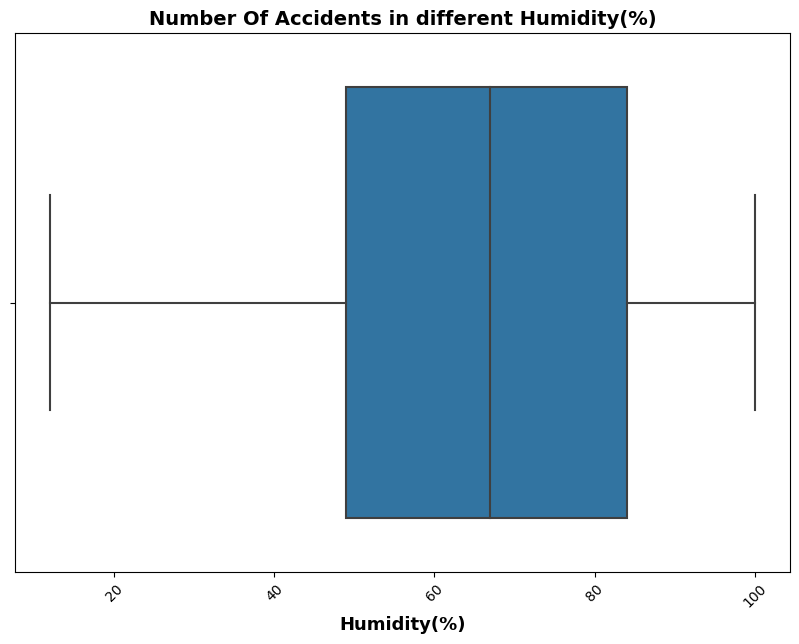

In [87]:
show_boxplot_of_feature('Humidity(%)')

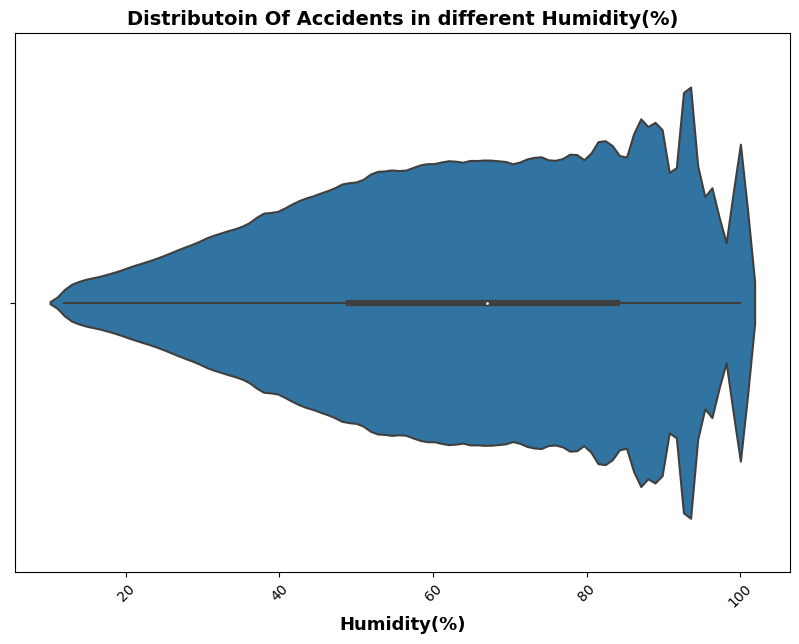

In [88]:
show_violinplot_of_feature('Humidity(%)')

### Pressure(in) Analysis

In [89]:
trim_data['Pressure(in)'].describe().T

count    7.063508e+06
mean     2.960899e+01
std      7.857891e-01
min      2.458000e+01
25%      2.941000e+01
50%      2.986000e+01
75%      3.003000e+01
max      3.044000e+01
Name: Pressure(in), dtype: float64

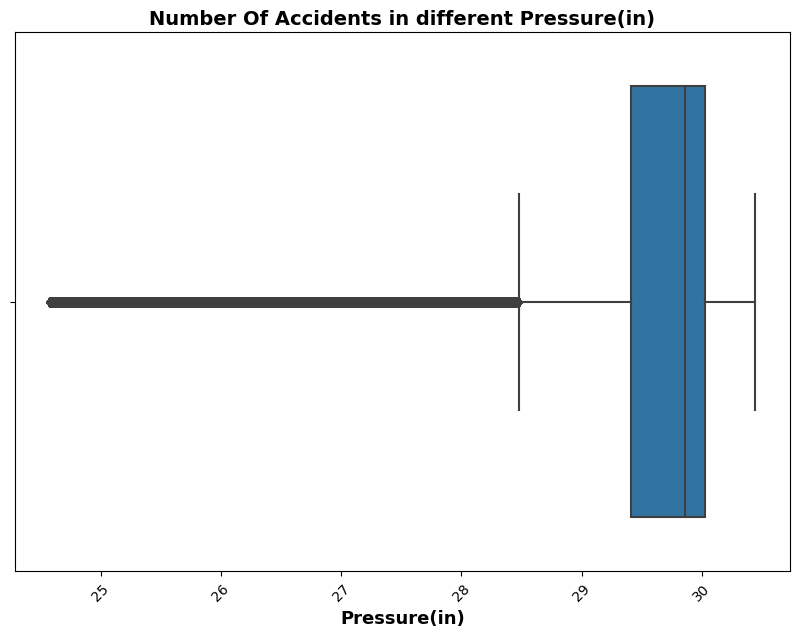

In [90]:
show_boxplot_of_feature('Pressure(in)')

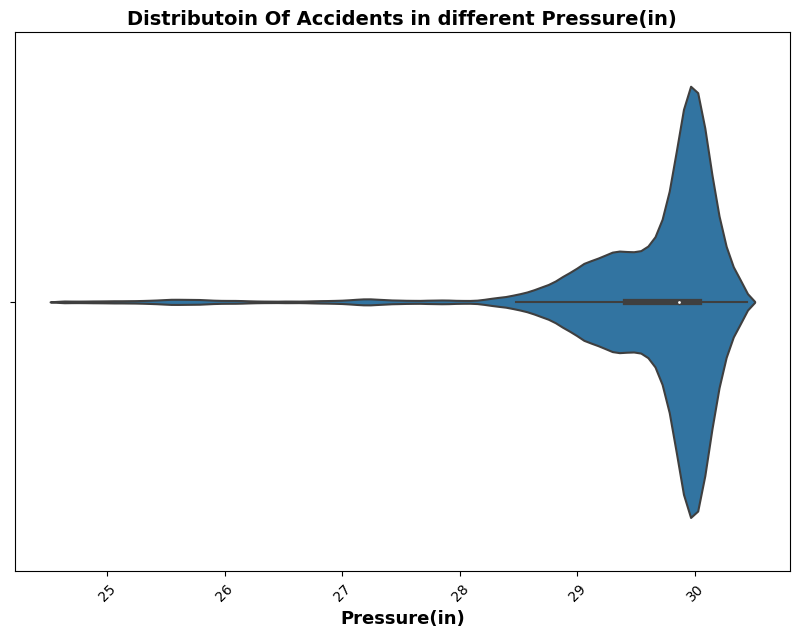

In [91]:
show_violinplot_of_feature('Pressure(in)')

### Visibility(mi) Analysis

In [92]:
trim_data['Visibility(mi)'].describe().T

count    7.030338e+06
mean     9.102024e+00
std      2.205740e+00
min      5.000000e-01
25%      1.000000e+01
50%      1.000000e+01
75%      1.000000e+01
max      1.000000e+01
Name: Visibility(mi), dtype: float64

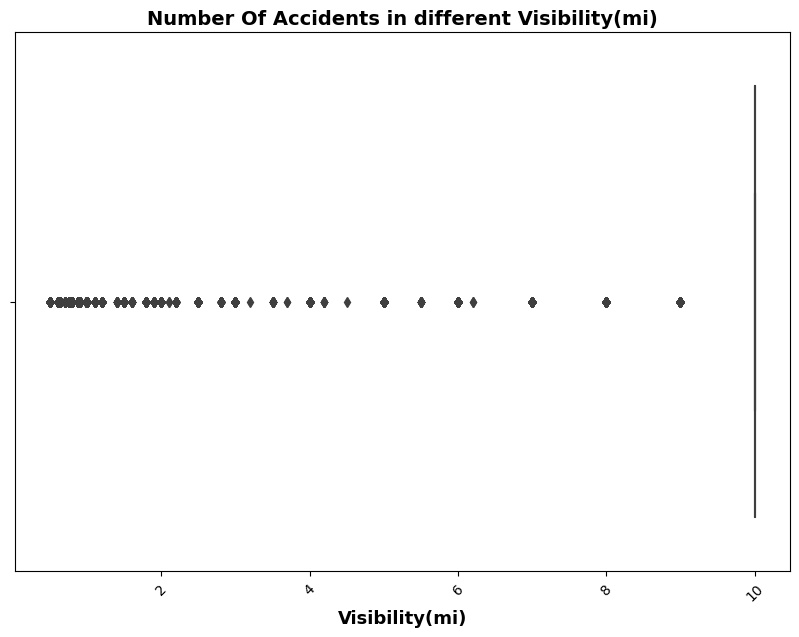

In [93]:
show_boxplot_of_feature('Visibility(mi)')

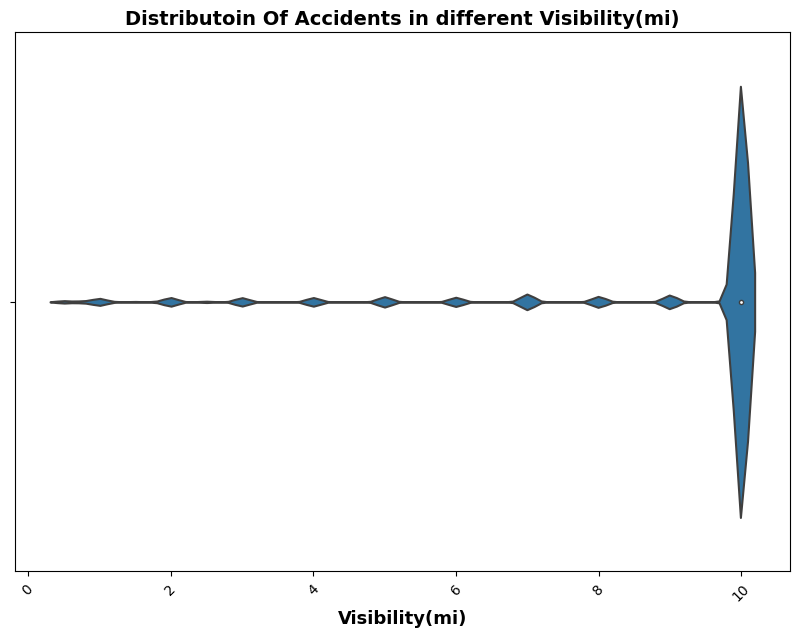

In [94]:
show_violinplot_of_feature('Visibility(mi)')

### Wind_Direction Analysis

In [95]:
trim_data['Wind_Direction'].describe().T

count     7032608
unique         24
top          CALM
freq       907766
Name: Wind_Direction, dtype: object

In [96]:
wind_dir = create_feature_df('Wind_Direction')
wind_dir

Wind_Direction  NumberOfAccidents
0            CALM             907766
1            Calm             343706
2               E             264379
3             ENE             242912
4             ESE             254431
5            East              97019
6               N             282930
7              NE             241299
8             NNE             235947
9             NNW             305070
10             NW             335167
11          North             139957
12              S             393166
13             SE             278577
14            SSE             328262
15            SSW             362514
16             SW             340457
17          South             166760
18            VAR             234804
19       Variable             106315
20              W             351148
21            WNW             343547
22            WSW             325762
23           West             150713

In [97]:
sorted_wind_dir = sorted_feature_df(wind_dir)
sorted_wind_dir

Wind_Direction  NumberOfAccidents
0            CALM             907766
12              S             393166
15            SSW             362514
20              W             351148
1            Calm             343706
21            WNW             343547
16             SW             340457
10             NW             335167
14            SSE             328262
22            WSW             325762
9             NNW             305070
6               N             282930
13             SE             278577
2               E             264379
4             ESE             254431
3             ENE             242912
7              NE             241299
8             NNE             235947
18            VAR             234804
17          South             166760
23           West             150713
11          North             139957
19       Variable             106315
5            East              97019

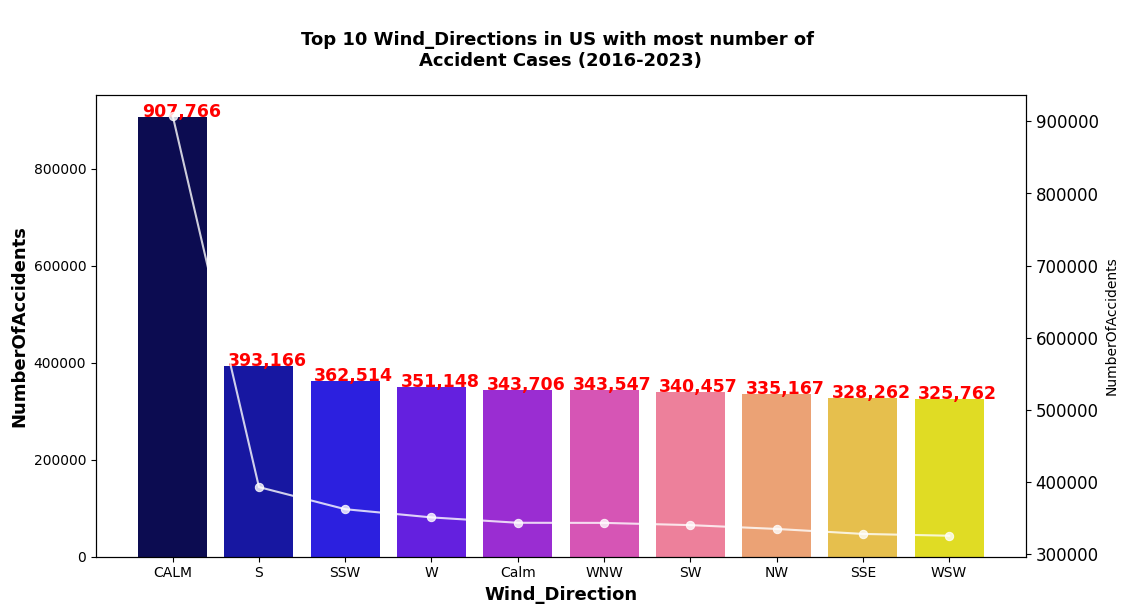

In [98]:
show_barplot_of_feature(sorted_wind_dir.head(10), 'Wind_Direction', '\nTop 10 Wind_Directions in US with most number of \nAccident Cases (2016-2023)\n')

In [99]:
del wind_dir
del sorted_wind_dir

### Wind_Speed(mph) Analysis

In [100]:
trim_data['Wind_Speed(mph)'].describe().T

count    6.663051e+06
mean     7.489998e+00
std      4.946136e+00
min      0.000000e+00
25%      4.600000e+00
50%      7.000000e+00
75%      1.000000e+01
max      2.300000e+01
Name: Wind_Speed(mph), dtype: float64

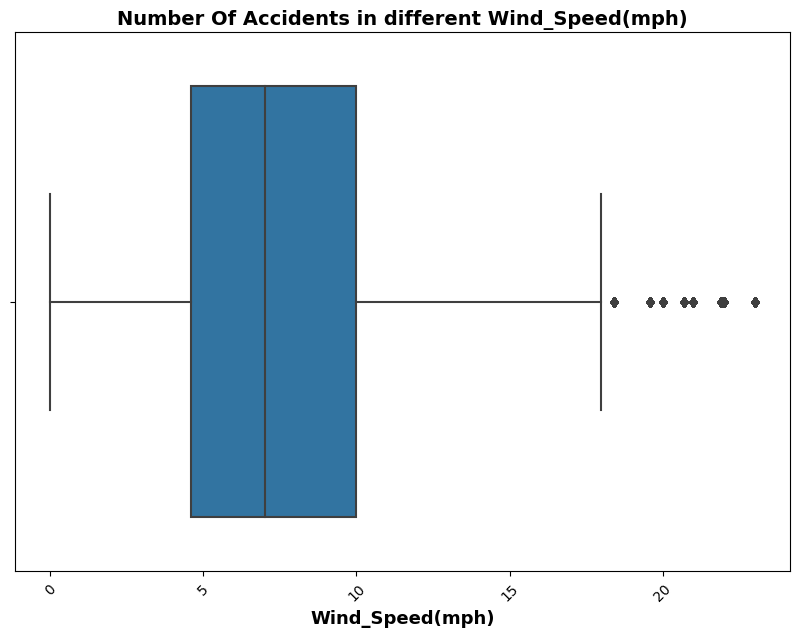

In [101]:
show_boxplot_of_feature('Wind_Speed(mph)')

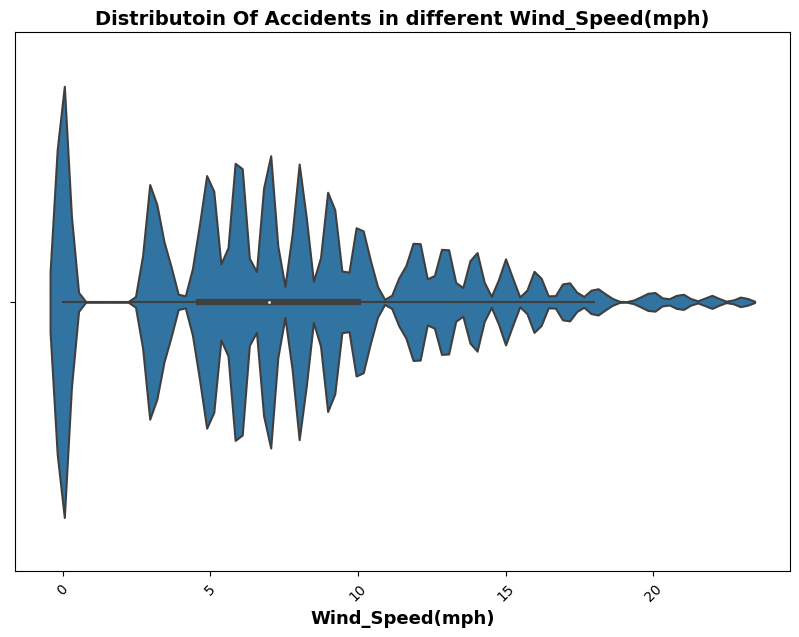

In [102]:
show_violinplot_of_feature('Wind_Speed(mph)')

### Weather_Condition Analysis

In [103]:
trim_data['Weather_Condition'].describe().T

count     7034474
unique        133
top          Fair
freq      2400250
Name: Weather_Condition, dtype: object

In [104]:
wea_con = create_feature_df('Weather_Condition')
wea_con

Weather_Condition  NumberOfAccidents
0               Blowing Dust                134
1       Blowing Dust / Windy                 29
2               Blowing Sand                  1
3               Blowing Snow                159
4       Blowing Snow / Windy                 33
..                       ...                ...
128             Volcanic Ash                 22
129          Widespread Dust                 81
130  Widespread Dust / Windy                  4
131               Wintry Mix              11043
132       Wintry Mix / Windy                191

[133 rows x 2 columns]

In [105]:
sorted_wea_con = sorted_feature_df(wea_con)
sorted_wea_con

Weather_Condition  NumberOfAccidents
14                          Fair            2400250
79                 Mostly Cloudy             970690
7                         Cloudy             791333
6                          Clear             744505
84                 Partly Cloudy             653502
..                           ...                ...
28   Heavy Freezing Rain / Windy                  1
9                  Drifting Snow                  1
122     Thunder and Hail / Windy                  1
37                   Heavy Smoke                  1
5            Blowing Snow Nearby                  1

[133 rows x 2 columns]

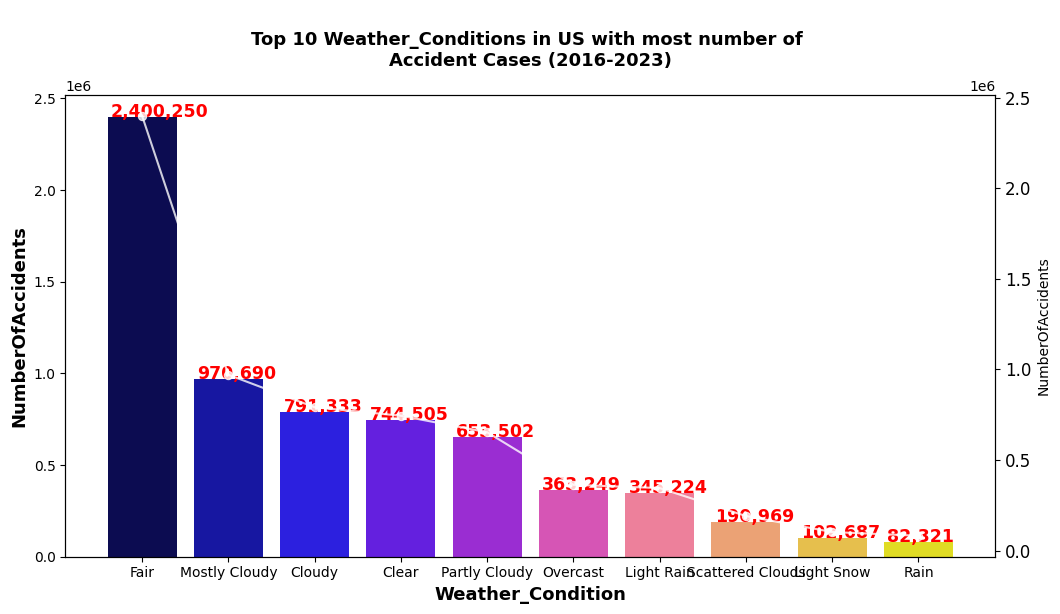

In [106]:
show_barplot_of_feature(sorted_wea_con.head(10), 'Weather_Condition', '\nTop 10 Weather_Conditions in US with most number of \nAccident Cases (2016-2023)\n')

In [107]:
del wea_con
del sorted_wea_con

### Boolean Features

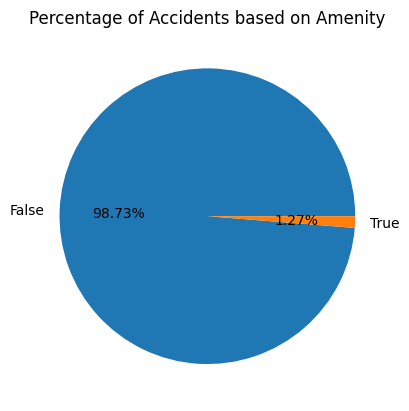

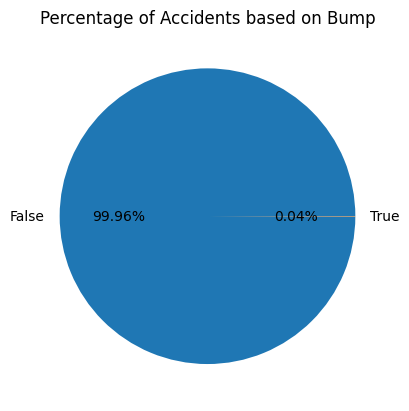

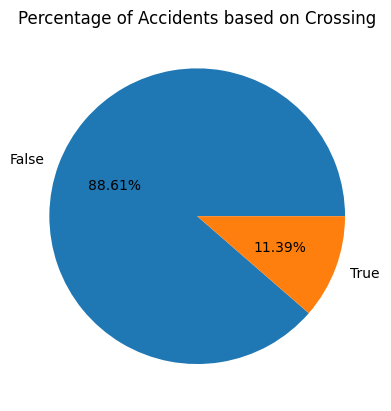

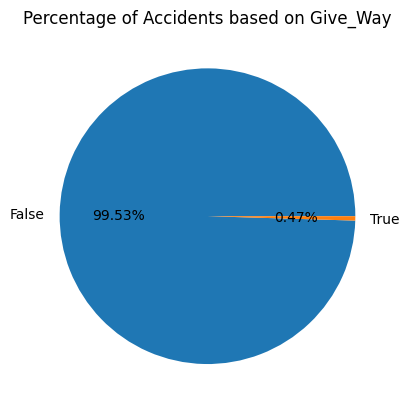

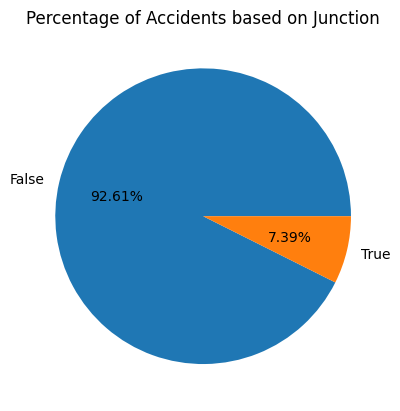

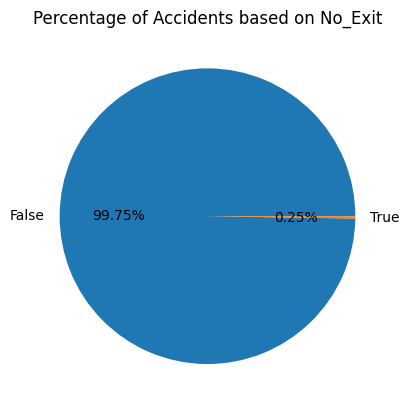

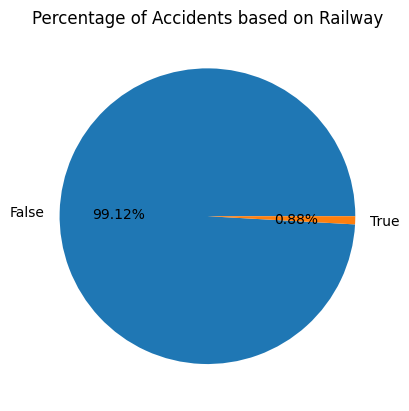

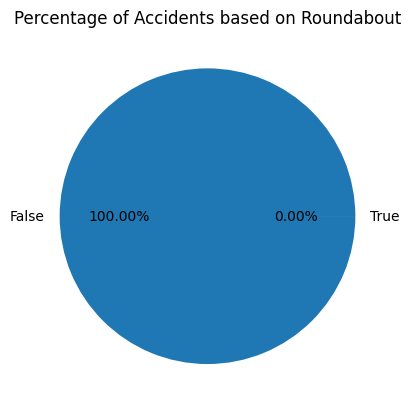

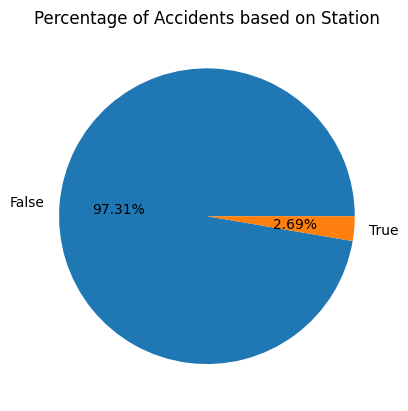

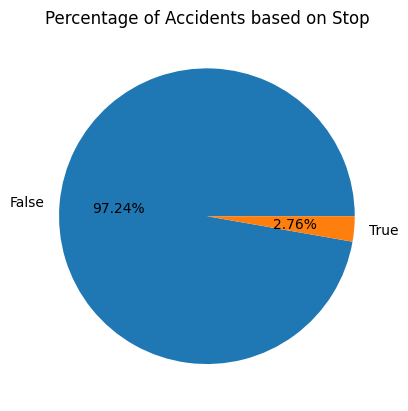

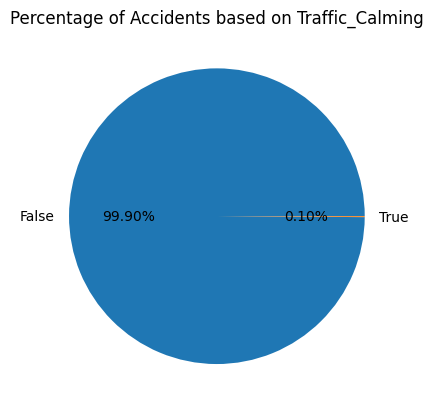

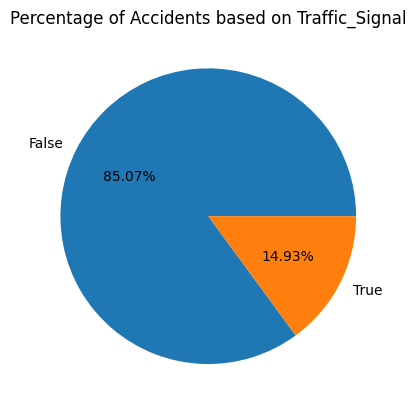

In [108]:
labels = ['False', 'True']
for feature in ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 
                'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']:
    show_pieplot_of_feature(feature, labels)

### Day Period Features

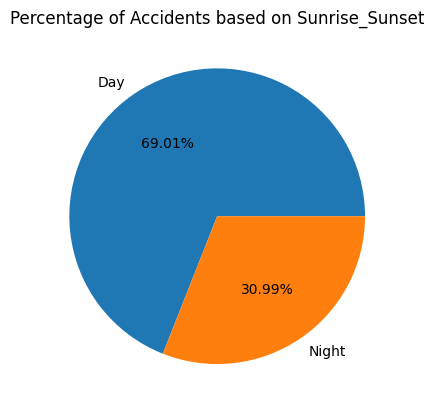

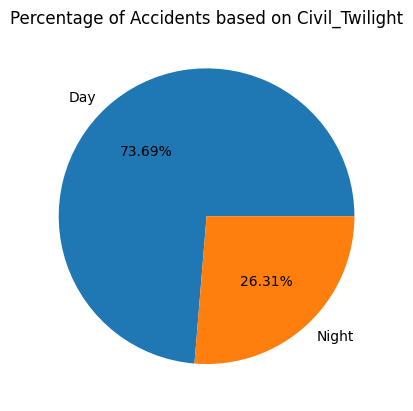

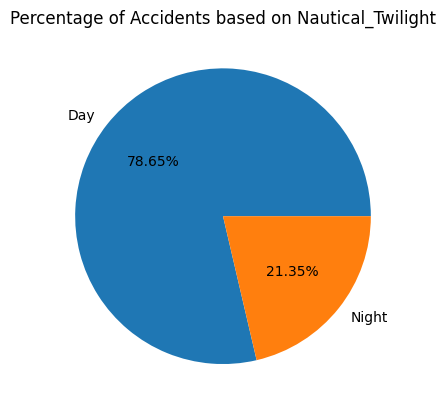

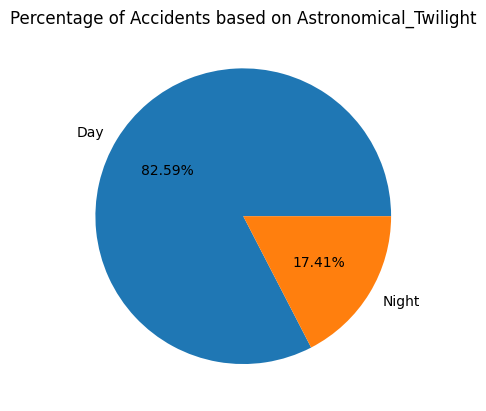

In [109]:
labels = ['Day', 'Night']
for feature in ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']:
    show_pieplot_of_feature(feature, labels)

### Year Analysis

In [110]:
trim_data['Year'].describe().T

count    6.985228e+06
mean     2.019701e+03
std      1.888793e+00
min      2.016000e+03
25%      2.018000e+03
50%      2.020000e+03
75%      2.021000e+03
max      2.023000e+03
Name: Year, dtype: float64

In [111]:
year = create_feature_df('Year')
year

Year  NumberOfAccidents
0  2016.0             388719
1  2017.0             672362
2  2018.0             824328
3  2019.0             882813
4  2020.0            1092872
5  2021.0            1329470
6  2022.0            1169525
7  2023.0             154033

In [112]:
sorted_year = year.sort_values(by=['Year'], ascending=True)
sorted_year

Year  NumberOfAccidents
0  2016.0             388719
1  2017.0             672362
2  2018.0             824328
3  2019.0             882813
4  2020.0            1092872
5  2021.0            1329470
6  2022.0            1169525
7  2023.0             154033

In [113]:
sorted_year['Year'] = sorted_year['Year'].astype(int)
sorted_year['Year'] = sorted_year['Year'].astype(str)

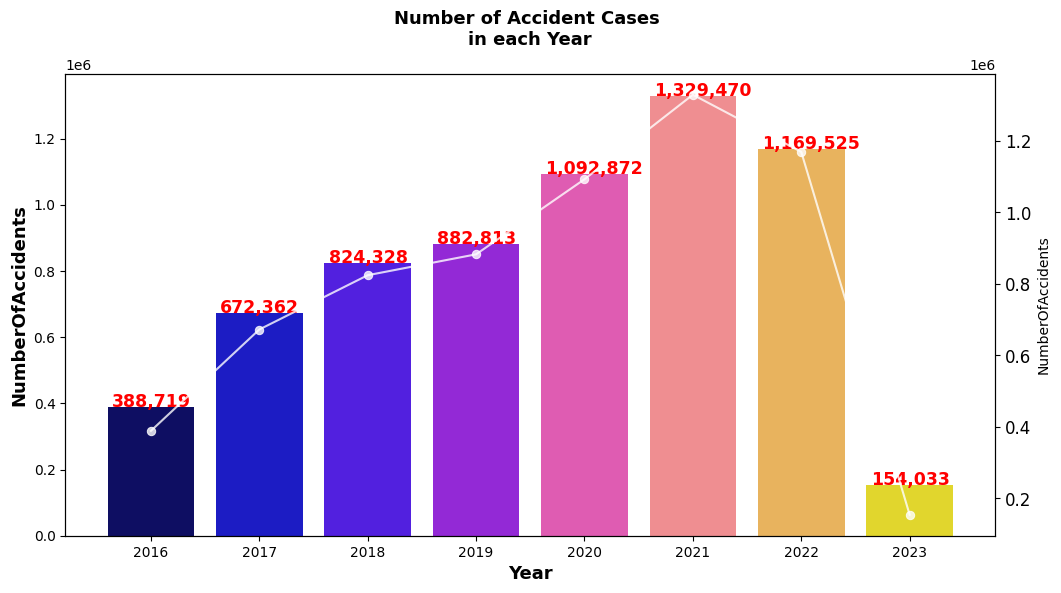

In [114]:
show_barplot_of_feature(sorted_year, 'Year', 'Number of Accident Cases \nin each Year\n')

In [115]:
del year
del sorted_year

### Month Analysis

In [116]:
trim_data['Month'].describe().T

count      6514122
unique          12
top       December
freq        692154
Name: Month, dtype: object

In [117]:
month = create_feature_df('Month')
month

Month  NumberOfAccidents
0       April             497560
1      August             514884
2    December             692154
3    February             522191
4     January             587057
5        July             432906
6        June             492415
7       March             467851
8         May             481268
9    November             660071
10    October             598940
11  September             566825

In [118]:
month_order = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
sorted_month = month.sort_values(by='Month', key=lambda x: x.map(month_order))
sorted_month

Month  NumberOfAccidents
4     January             587057
3    February             522191
7       March             467851
0       April             497560
8         May             481268
6        June             492415
5        July             432906
1      August             514884
11  September             566825
10    October             598940
9    November             660071
2    December             692154

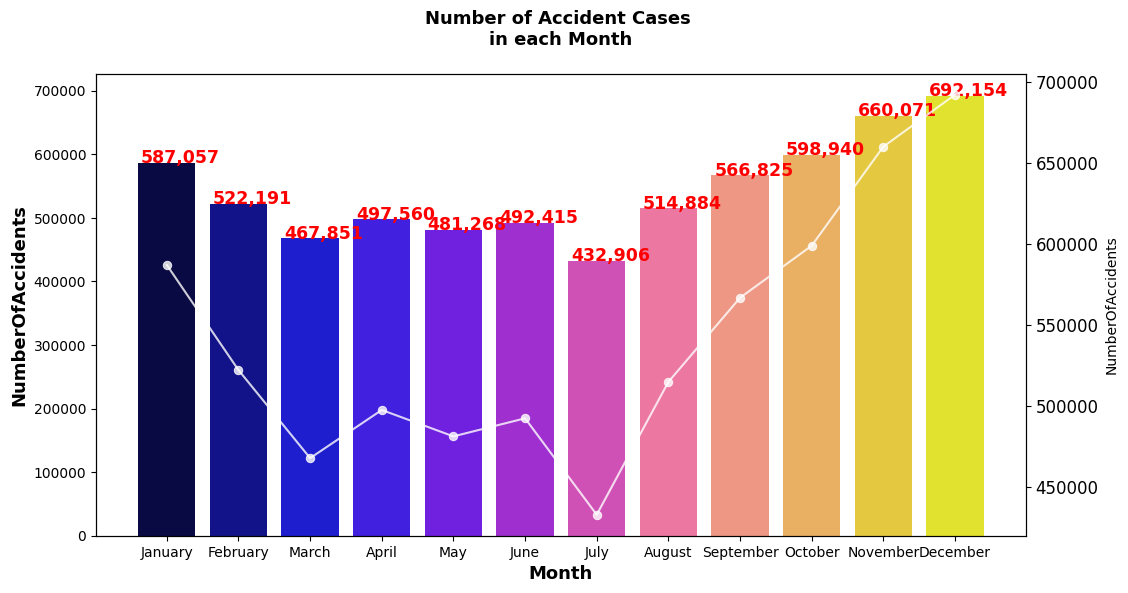

In [119]:
show_barplot_of_feature(sorted_month, 'Month', 'Number of Accident Cases \nin each Month\n')

In [120]:
del month
del sorted_month

### Day Analysis

In [121]:
trim_data['Day'].describe().T

count     6514122
unique          7
top        Friday
freq      1150009
Name: Day, dtype: object

In [122]:
day = create_feature_df('Day')
day

Day  NumberOfAccidents
0     Friday            1150009
1     Monday            1034854
2   Saturday             540027
3     Sunday             457571
4   Thursday            1116412
5    Tuesday            1096110
6  Wednesday            1119139

In [123]:
day_order = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
sorted_day = day.sort_values(by='Day', key=lambda x: x.map(day_order))
sorted_day

Day  NumberOfAccidents
1     Monday            1034854
5    Tuesday            1096110
6  Wednesday            1119139
4   Thursday            1116412
0     Friday            1150009
2   Saturday             540027
3     Sunday             457571

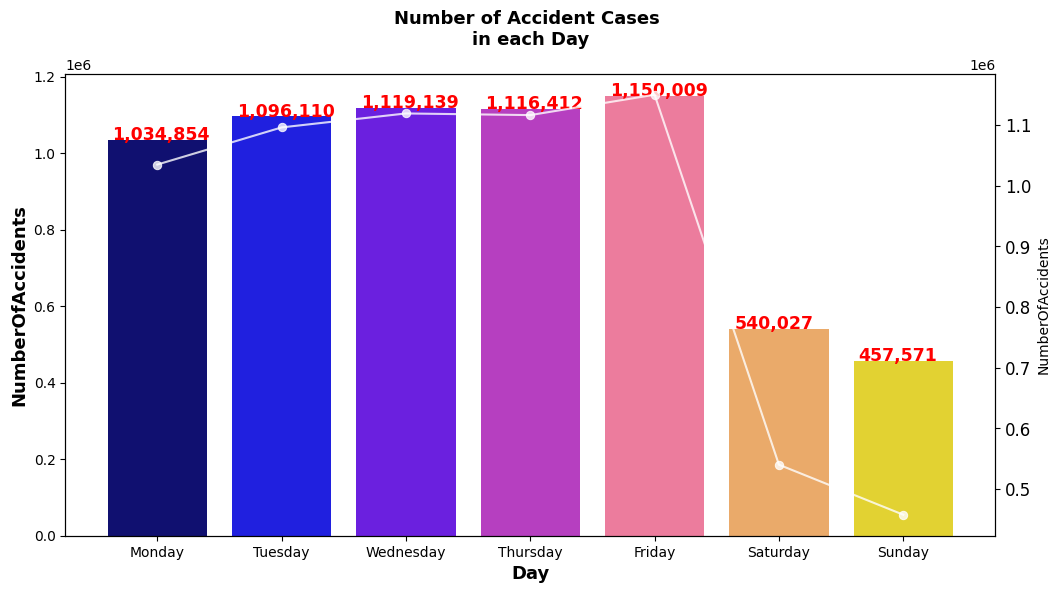

In [124]:
show_barplot_of_feature(sorted_day, 'Day', 'Number of Accident Cases \nin each Day\n')

In [125]:
del day
del sorted_day

### Hour Analysis

In [126]:
trim_data['Hour'].describe().T

count    6.514122e+06
mean     1.226891e+01
std      5.479502e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.300000e+01
75%      1.700000e+01
max      2.300000e+01
Name: Hour, dtype: float64

In [127]:
hour = create_feature_df('Hour')
hour

Hour  NumberOfAccidents
0    0.0              93683
1    1.0              81189
2    2.0              78058
3    3.0              70164
4    4.0             140851
5    5.0             196755
6    6.0             349434
7    7.0             508464
8    8.0             504636
9    9.0             311040
10  10.0             293077
11  11.0             301211
12  12.0             294246
13  13.0             324529
14  14.0             361982
15  15.0             425983
16  16.0             480671
17  17.0             481405
18  18.0             366518
19  19.0             251976
20  20.0             191321
21  21.0             160860
22  22.0             141049
23  23.0             105020

In [128]:
sorted_hour = hour.sort_values(by=['Hour'], ascending=True)
sorted_hour

Hour  NumberOfAccidents
0    0.0              93683
1    1.0              81189
2    2.0              78058
3    3.0              70164
4    4.0             140851
5    5.0             196755
6    6.0             349434
7    7.0             508464
8    8.0             504636
9    9.0             311040
10  10.0             293077
11  11.0             301211
12  12.0             294246
13  13.0             324529
14  14.0             361982
15  15.0             425983
16  16.0             480671
17  17.0             481405
18  18.0             366518
19  19.0             251976
20  20.0             191321
21  21.0             160860
22  22.0             141049
23  23.0             105020

In [129]:
sorted_hour['Hour'] = sorted_hour['Hour'].astype(int)
sorted_hour['Hour'] = sorted_hour['Hour'].astype(str)

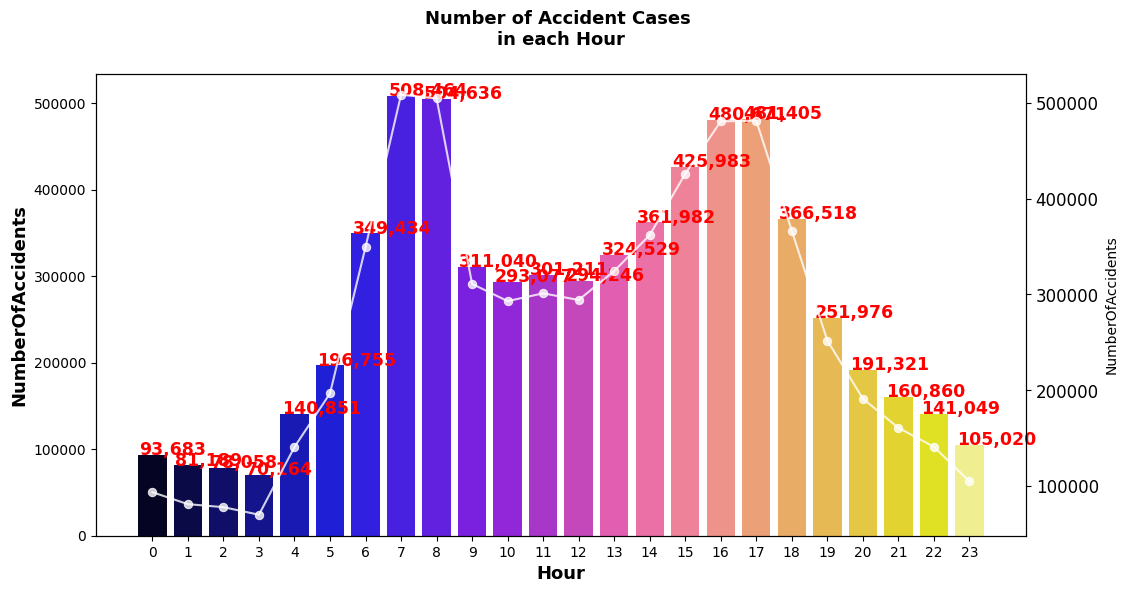

In [130]:
show_barplot_of_feature(sorted_hour, 'Hour', 'Number of Accident Cases \nin each Hour\n')

In [131]:
del hour
del sorted_hour

In [132]:
crosstab = pd.crosstab(trim_data['Timezone'], trim_data['Severity'])
crosstab

Severity         1        2       3       4
Timezone                                   
US/Central   11984  1170092  306895   30406
US/Eastern   31148  2733407  550208  120621
US/Mountain   6043   241059   38599    9086
US/Pacific   12488  1604938  304937   22011

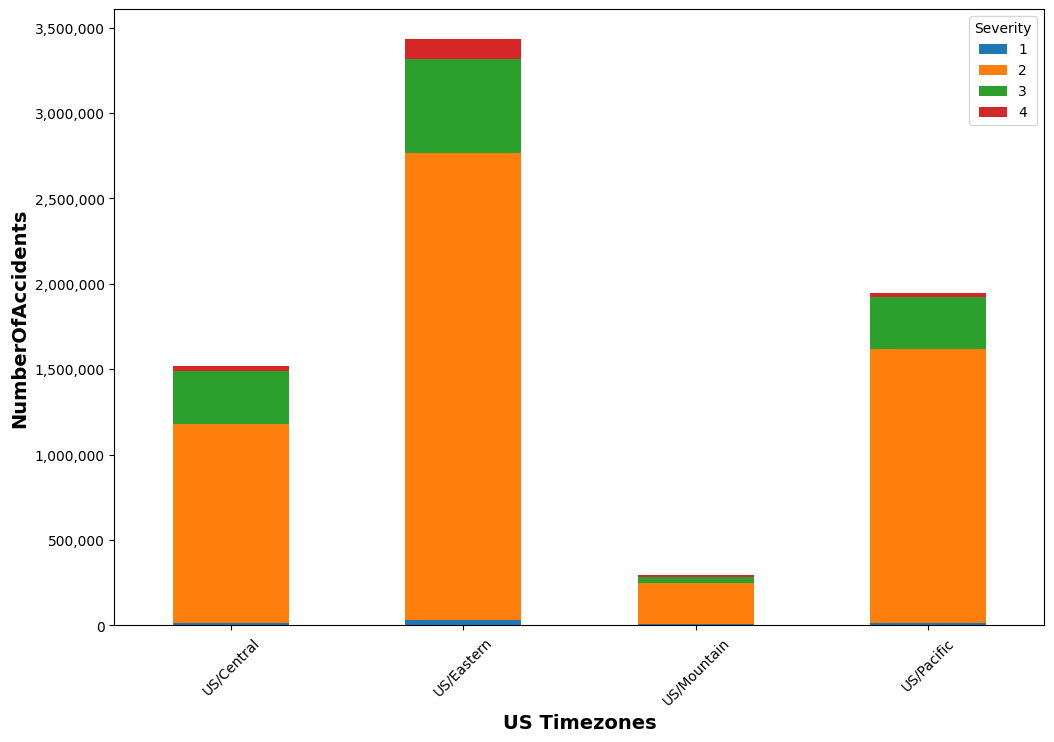

In [133]:
from matplotlib import ticker

crosstab.plot(kind="bar",stacked=True,
              figsize=(12,8),
              rot=45,
              fontsize=10)


plt.xlabel("US Timezones", fontsize=14, fontweight="bold")
plt.ylabel("NumberOfAccidents", fontsize=14, fontweight="bold")

formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()